In [349]:
import pandas as pd
import sqlite3
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from kneed import KneeLocator
from sklearn.metrics import davies_bouldin_score

from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn import cluster
import sklearn.metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes


In [350]:
df= pd.read_csv('projet5.csv')

In [351]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp order_estimated_delivery_date  \
0    delivered      2017-10-02 10:56:33                    2017-10-18   
1    delivered      2017-10-02 10:56:33                    2017-10-18   
2    delivered      2017-10-02 10:56:33                    2017-10-18   
3    delivered      2018-07-24 20:41:37                    2018-08-13   
4    delivered      2018-08-08 08:38:49                    2018-09-04   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149     sao paulo   
3  af07308b275d755c9edb36a90c618231                     47813     barreiras   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265    vianopolis   

  customer_state                         review_id  ...  freight_value  \
0             SP  a54f0611adc9ed256b57ede6b6eb5114  ...           8.72   
1             SP  a54f0611adc9ed256b57ede6b6eb5114  ...           8.72   
2             SP  a54f0611adc9ed256b57ede6b6eb5114  ...           8.72   
3             BA  8d5266042046a06655c8db133d120ba5  ...          22.76   
4             GO  e73b67b67587f7644d5bd1a52deb1b01  ...          19.22   

   payment_sequential payment_type payment_installments  payment_value  \
0                 1.0  credit_card                  1.0          18.12   
1                 3.0      voucher                  1.0           2.00   
2                 2.0      voucher                  1.0          18.59   
3                 1.0       boleto                  1.0         141.46   
4                 1.0  credit_card                  3.0         179.12   

   product_length_cm  product_category_name_english seller_zip_code_prefix  \
0               19.0                     housewares                 9350.0   
1               19.0                     housewares                 9350.0   
2               19.0                     housewares                 9350.0   
3               19.0                      perfumery                31570.0   
4               24.0                           auto                14840.0   

      seller_city  seller_state  
0            maua            SP  
1            maua            SP  
2            maua            SP  
3  belo horizonte            SP  
4         guariba            SP  

[5 rows x 25 columns]

In [352]:
df.describe(include='all')

order_id                       customer_id  \
count                             119143                            119143   
unique                             99441                             99441   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status order_purchase_timestamp order_estimated_delivery_date  \
count        119143                   119143                        119143   
unique            8                    98875                           459   
top       delivered      2017-08-08 20:26:31                    2017-12-20   
freq         115723                       63                           663   
mean            NaN                      NaN                           NaN   
std             NaN                      NaN                           NaN   
min             NaN                      NaN                           NaN   
25%             NaN                      NaN                           NaN   
50%             NaN                      NaN                           NaN   
75%             NaN                      NaN                           NaN   
max             NaN                      NaN                           NaN   

                      customer_unique_id  customer_zip_code_prefix  \
count                             119143             119143.000000   
unique                             96096                       NaN   
top     9a736b248f67d166d2fbb006bcb877c3                       NaN   
freq                                  75                       NaN   
mean                                 NaN              35033.451298   
std                                  NaN              29823.198969   
min                                  NaN               1003.000000   
25%                                  NaN              11250.000000   
50%                                  NaN              24240.000000   
75%                                  NaN              58475.000000   
max                                  NaN              99990.000000   

       customer_city customer_state                         review_id  ...  \
count         119143         119143                            118146  ...   
unique          4119             27                             98410  ...   
top        sao paulo             SP  eef5dbca8d37dfce6db7d7b16dd0525e  ...   
freq           18875          50265                                63  ...   
mean             NaN            NaN                               NaN  ...   
std              NaN            NaN                               NaN  ...   
min              NaN            NaN                               NaN  ...   
25%              NaN            NaN                               NaN  ...   
50%              NaN            NaN                               NaN  ...   
75%              NaN            NaN                               NaN  ...   
max              NaN            NaN                               NaN  ...   

        freight_value  payment_sequential payment_type payment_installments  \
count   118310.000000       119140.000000       119140        119140.000000   
unique            NaN                 NaN            5                  NaN   
top               NaN                 NaN  credit_card                  NaN   
freq              NaN                 NaN        87776          

In [353]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_id                         997
review_score                      997
order_item_id                     833
product_id                        833
seller_id                         833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_length_cm                 853
product_category_name_english    2567
seller_zip_code_prefix            833
seller_city                       833
seller_state                      833
dtype: int64

In [297]:
df= df.dropna()

# Analyse RFM

RFM (Récence, Fréquence, Montant) est une technique d'analyse de la clientèle qui est couramment utilisée dans le domaine du marketing et de la gestion de la relation client (CRM). Elle permet de segmenter les clients en fonction de leur comportement d'achat, en se basant sur trois principales dimensions : la récence, la fréquence et le montant.

**Récence (Recency)** : Il s'agit de la mesure de la dernière fois qu'un client a effectué un achat. Une récence plus récente est généralement associée à un client plus actif.

**Fréquence (Frequency)** : Cela représente le nombre total d'achats effectués par un client sur une période donnée. Un client qui achète fréquemment peut être considéré comme plus fidèle ou engagé.

**Montant (Monetary)** : Il s'agit du montant total des dépenses effectuées par un client sur une période donnée. Cela donne une indication sur la valeur monétaire du client pour l'entreprise

In [354]:
# Convertir les dates en objets datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Grouper par 'customer_unique_id' et obtenir la date de la dernière commande
recency_df = df.groupby(['customer_unique_id'], as_index=False)['order_purchase_timestamp'].max()

# Trouver la date la plus ancienne dans l'ensemble des données
oldest_date = df['order_purchase_timestamp'].min()

# Calculer la récence en jours pour chaque client par rapport à la date la plus ancienne
recency_df['recency'] = recency_df['order_purchase_timestamp'].apply(lambda x: (oldest_date - x).days * -1)

# Afficher les premières lignes du DataFrame résult
recency_df.head()


customer_unique_id order_purchase_timestamp  recency
0  0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:27      613
1  0000b849f77a49e4a4ce2b2a4ca5be3f      2018-05-07 11:11:27      610
2  0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03      187
3  0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41      403
4  0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42      436

In [355]:
# Calculer la fréquence d'achat (nombre de commandes par client)
frequency_df = df.groupby('customer_unique_id', as_index=False)['order_id'].count()

# Renommer la colonne 'order_id' en 'frequency'
frequency_df.rename(columns={"order_id": "frequency"}, inplace=True)

# Afficher les premières lignes du DataFrame résultant
frequency_df.head()


customer_unique_id  frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

In [356]:
# Calculer la dimension "Montant" (Monetary)
monetary_df = df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()

# Renommer la colonne 'payment_value' en 'monetary'
monetary_df.rename(columns={"payment_value": "monetary"}, inplace=True)

# Afficher les premières lignes du DataFrame résultant
monetary_df.head()


customer_unique_id  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2  0000f46a3911fa3c0805444483337064     86.22
3  0000f6ccb0745a6a4b88665a16c9f078     43.62
4  0004aac84e0df4da2b147fca70cf8255    196.89

In [357]:
#Merge dataframes
rfm_df = recency_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')
rfm_df.drop(columns='order_purchase_timestamp', inplace = True)
rfm_df.head()

customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      613          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      610          1     27.19
2  0000f46a3911fa3c0805444483337064      187          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      403          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      436          1    196.89

****************************************************************************************************
Analyse de la colonne recency
****************************************************************************************************
Moyenne : 485.04
Médiane : 504.0
Mode : 0    446
Name: recency, dtype: int64
Variance : 23535.62
Écart type : 153.41
Asymétrie : -0.45
Kurtosis : -0.65
Minimum : 0
25% : 376.0
50% : 504.0
75% : 609.0
Maximum : 773
la distribution de la colonne recency est étalée à gauche
la distribution de la colonne recency est plus aplatie que la distribution normale


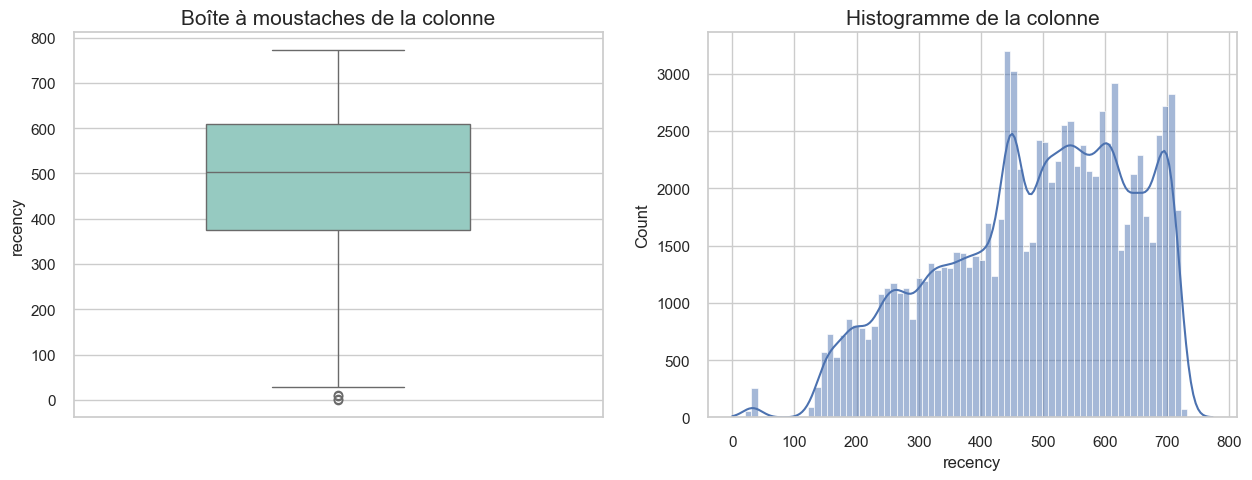

****************************************************************************************************
Analyse de la colonne frequency
****************************************************************************************************
Moyenne : 1.24
Médiane : 1.0
Mode : 0    1
Name: frequency, dtype: int64
Variance : 0.73
Écart type : 0.85
Asymétrie : 15.51
Kurtosis : 760.42
Minimum : 1
25% : 1.0
50% : 1.0
75% : 1.0
Maximum : 75
la distribution de la colonne frequency est étalée à droite
la distribution de la colonne frequency est moins aplatie que la distribution normale


<Figure size 1300x1000 with 0 Axes>

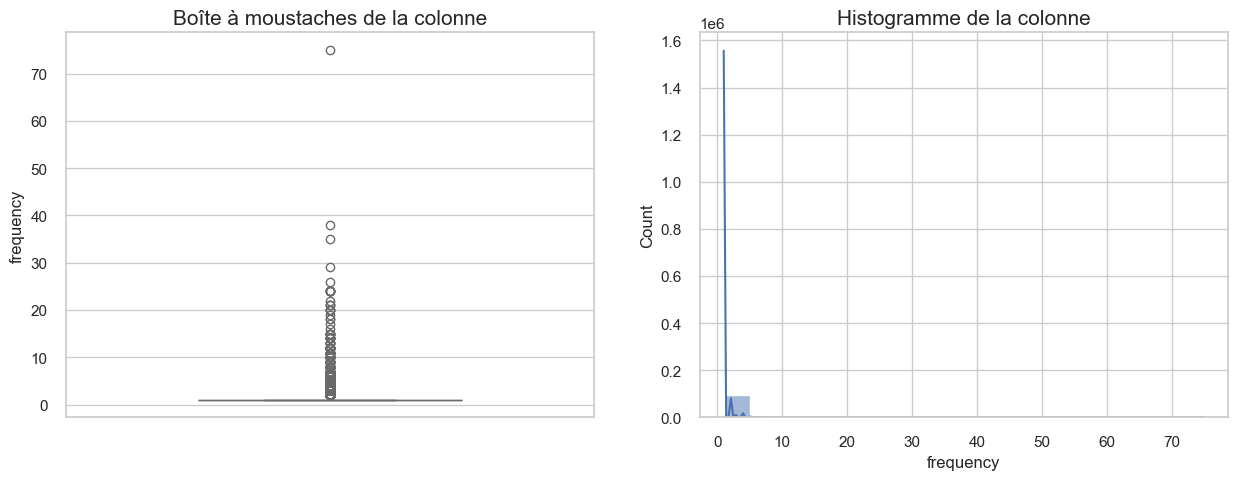

****************************************************************************************************
Analyse de la colonne monetary
****************************************************************************************************
Moyenne : 214.16
Médiane : 113.34
Mode : 0    77.57
Name: monetary, dtype: float64
Variance : 415885.67
Écart type : 644.89
Asymétrie : 68.01
Kurtosis : 9357.28
Minimum : 0.0
25% : 64.0
50% : 113.34
75% : 203.42
Maximum : 109312.64
la distribution de la colonne monetary est étalée à droite
la distribution de la colonne monetary est moins aplatie que la distribution normale


<Figure size 1300x1000 with 0 Axes>

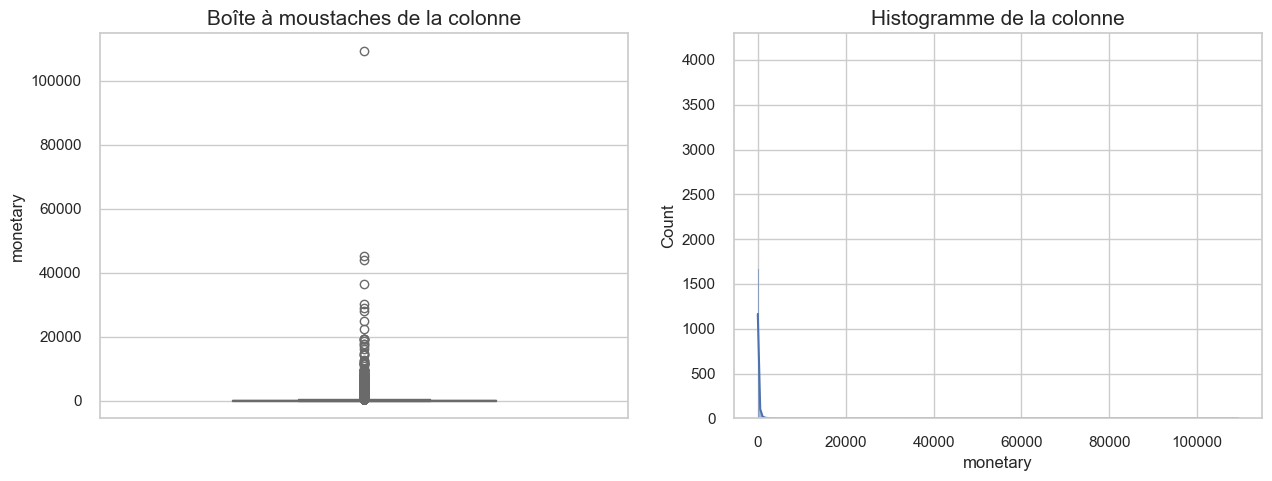

<Figure size 1300x1000 with 0 Axes>

In [359]:
#analyse univariée 
colonnes_numeriques = rfm_df.select_dtypes(include=[np.number]).columns.tolist()

color_palette = 'Set3'

for colonne in colonnes_numeriques:
    print('**' * 50)
    print('Analyse de la colonne', colonne)
    print('**' * 50)

    print('Moyenne :', round(rfm_df[colonne].mean(), 2))
    print('Médiane :', round(rfm_df[colonne].median(), 2))
    print('Mode :', round(rfm_df[colonne].mode(), 2))
    print('Variance :', round(rfm_df[colonne].var(), 2))
    print('Écart type :', round(rfm_df[colonne].std(), 2))
    print('Asymétrie :', round(rfm_df[colonne].skew(), 2))
    print('Kurtosis :', round(rfm_df[colonne].kurtosis(), 2))
    print('Minimum :', round(rfm_df[colonne].min(), 2))
    print('25% :', round(rfm_df[colonne].quantile(0.25), 2))
    print('50% :', round(rfm_df[colonne].quantile(0.5), 2))
    print('75% :', round(rfm_df[colonne].quantile(0.75), 2))
    print('Maximum :', round(rfm_df[colonne].max(), 2))

    if np.floor(rfm_df[colonne].skew()) == 0:
        print('la distribution de la colonne ' + colonne + ' est symétrique')
    elif round(rfm_df[colonne].skew(), 2) > 0:
        print('la distribution de la colonne ' + colonne + ' est étalée à droite')
    else:
        print('la distribution de la colonne ' + colonne + ' est étalée à gauche')

    if np.floor(rfm_df[colonne].kurtosis()) == 0:
        print('la distribution de la colonne ' + colonne + ' a le même aplatissement que la distribution normale')
    elif round(rfm_df[colonne].kurtosis(), 2) > 0:
        print('la distribution de la colonne ' + colonne + ' est moins aplatie que la distribution normale')
    else:
        print('la distribution de la colonne ' + colonne + ' est plus aplatie que la distribution normale')

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(rfm_df[colonne], width=0.5, palette=color_palette)
    plt.title('Boîte à moustaches de la colonne', fontsize=15)
    plt.subplot(1, 2, 2)
    sns.histplot(rfm_df[colonne], kde=True, palette=color_palette)
    plt.title('Histogramme de la colonne', fontsize=15)
    plt.show()
    plt.tight_layout()

#  clustering

## kmeans

In [302]:
rfm_df2= rfm_df.copy()

In [303]:
rfm_df10=rfm_df.copy()

In [304]:
# Indexation par la colonne id
rfm_df.set_index('customer_unique_id',inplace = True)
# Centrage et réduction des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_df)


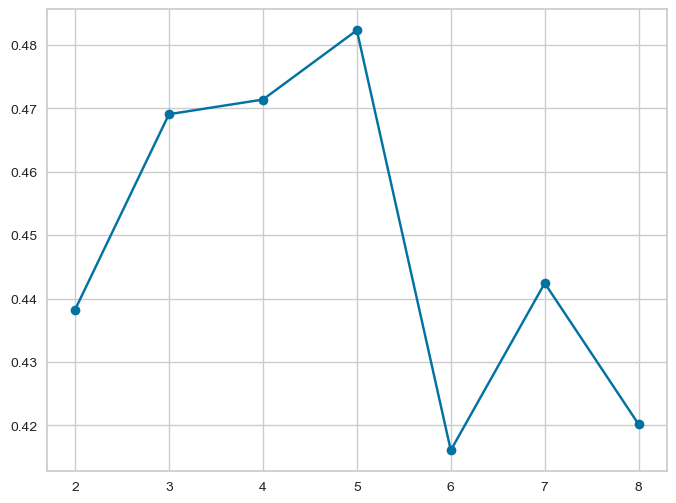

In [31]:
#coefficient de silhouette

#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
silhouettes = [] 
#Boucle itérative de 2 à 9 (clusters) pour tester les possibilités
for k in range(2, 9): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.figure(figsize=(8, 6)) 
plt.plot(range(2, 9), silhouettes, marker='o')
plt.show()

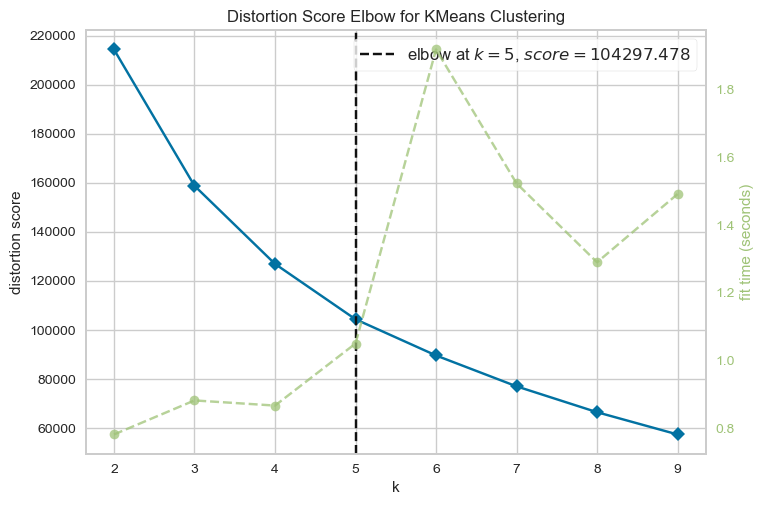

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()

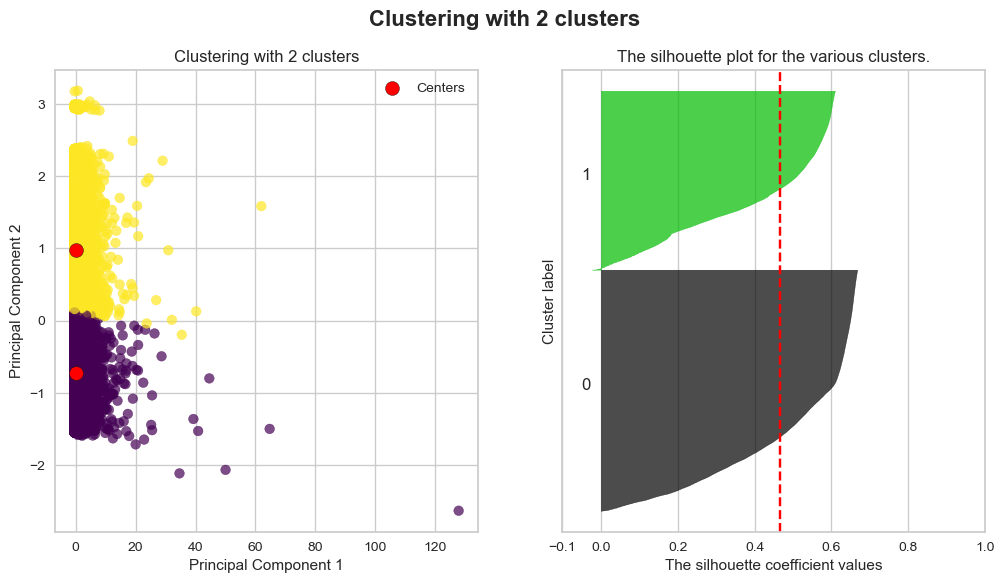

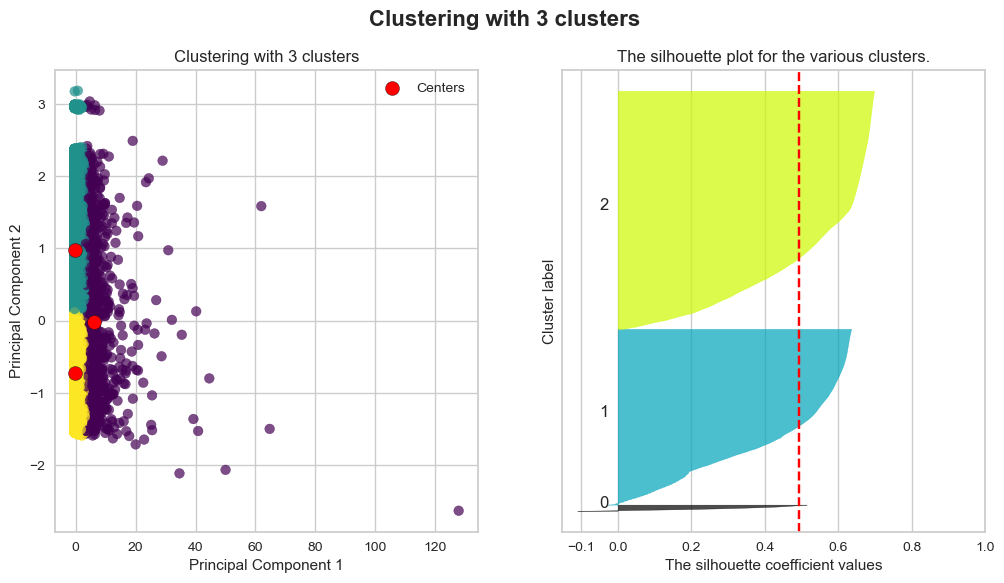

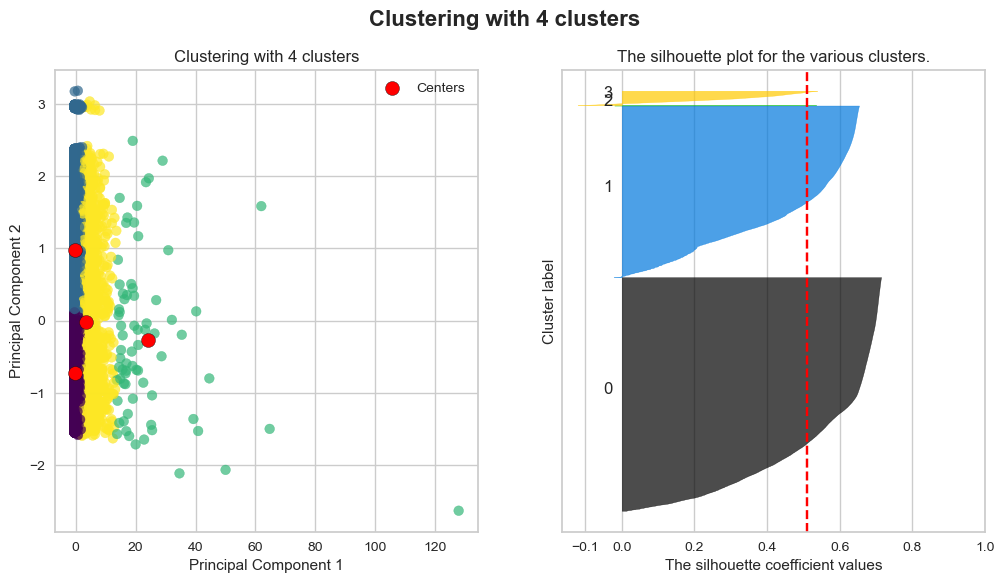

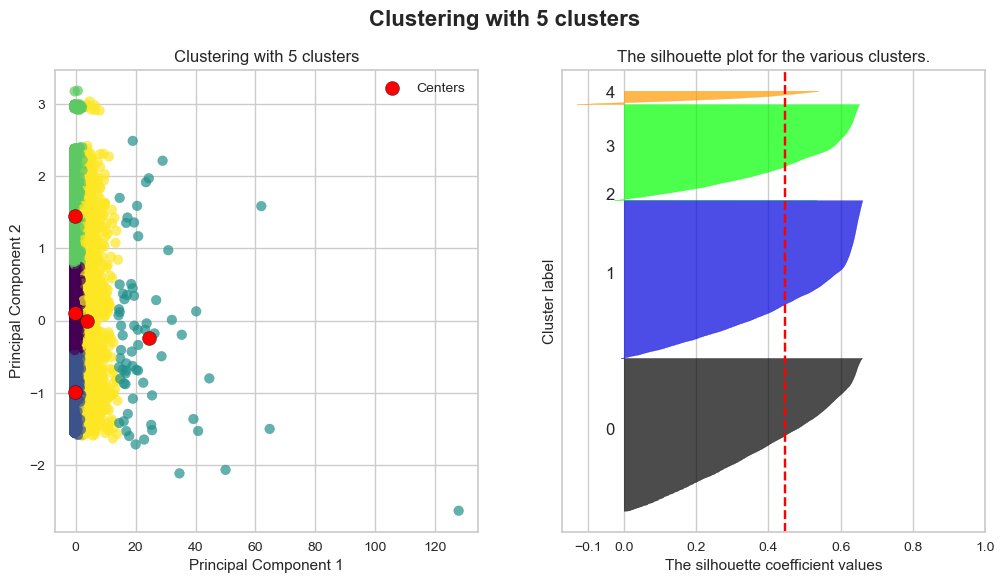

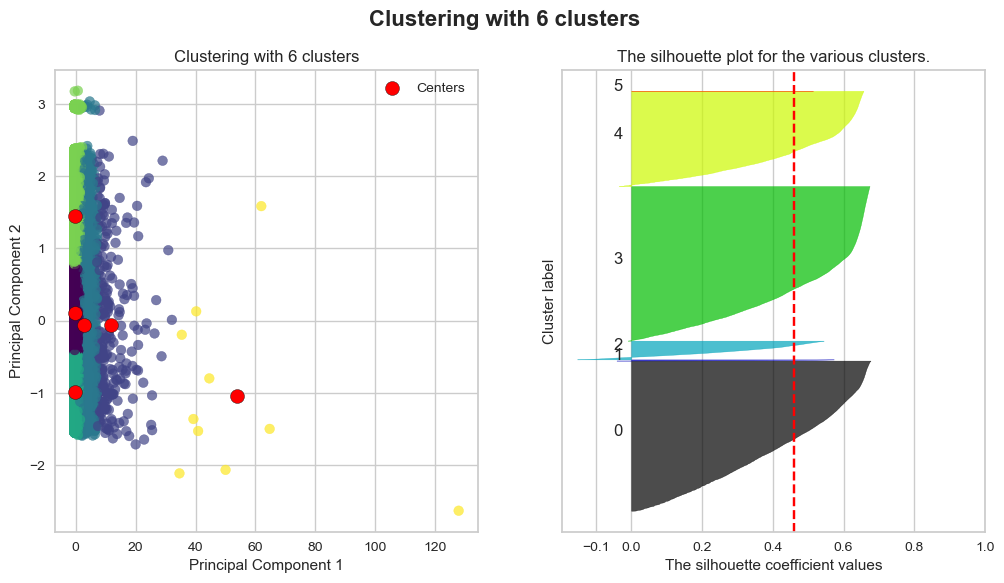

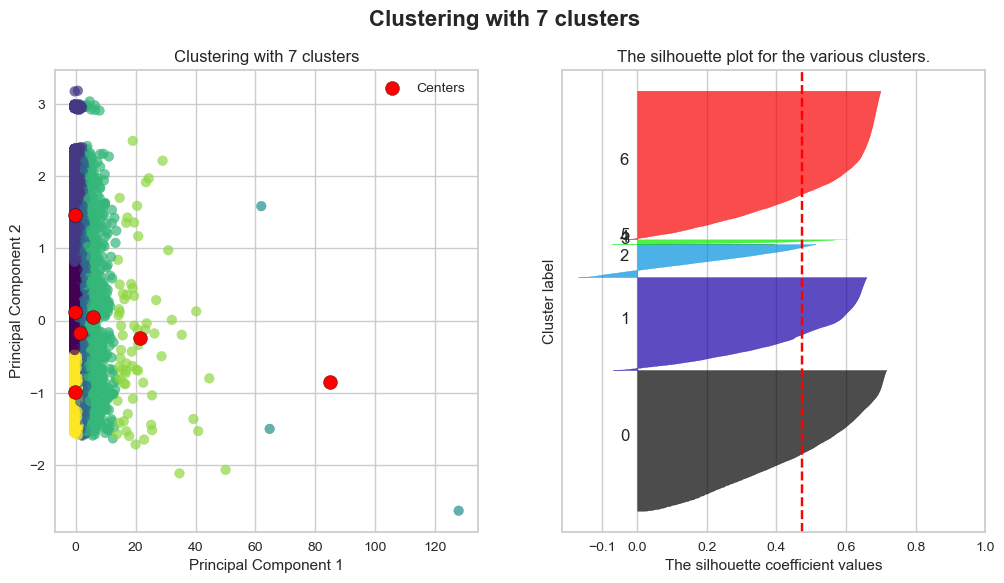

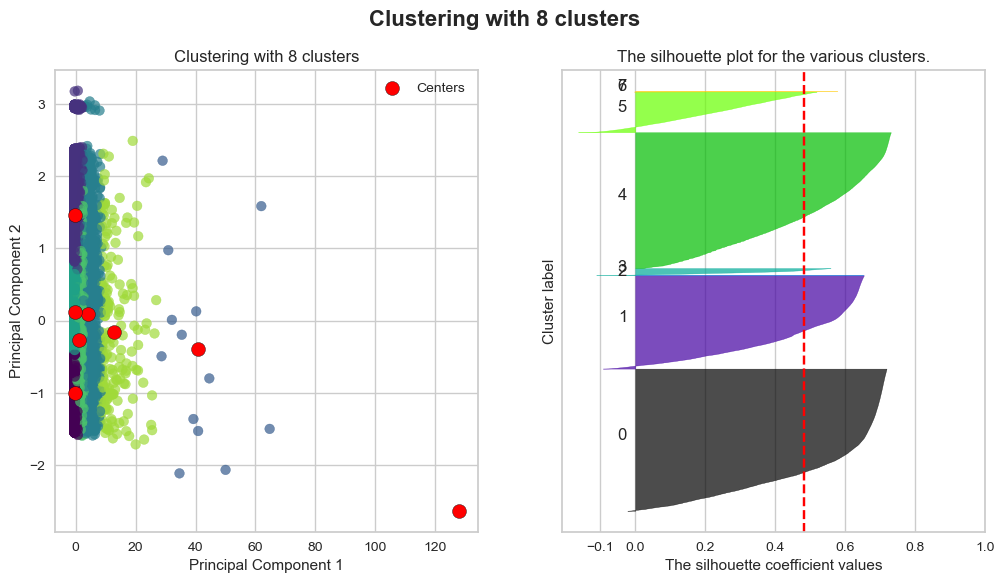

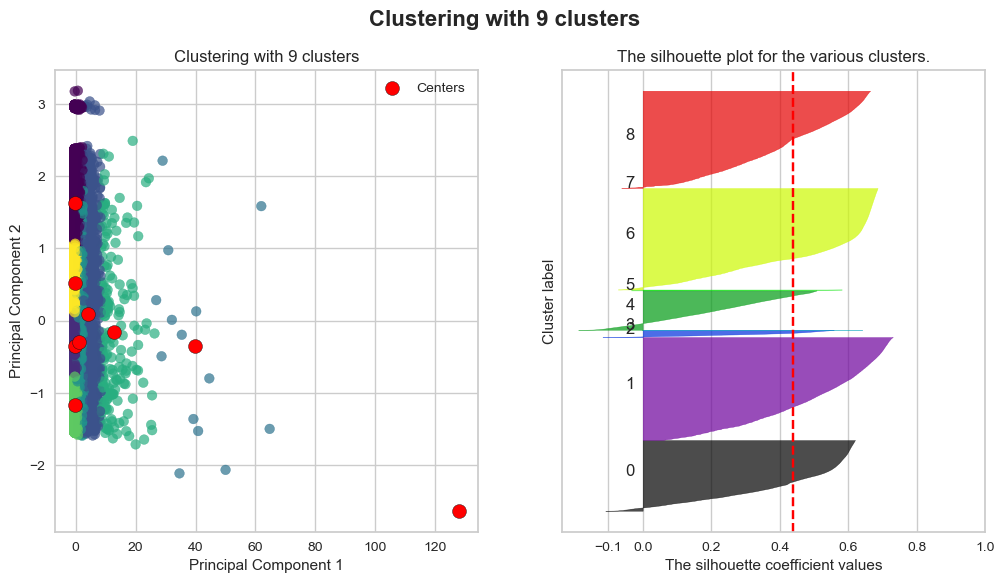

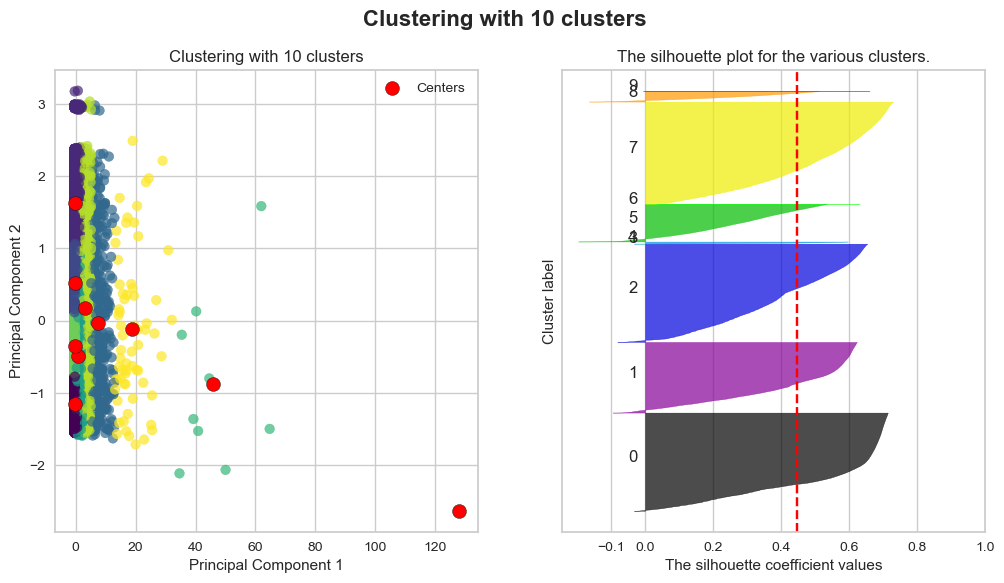

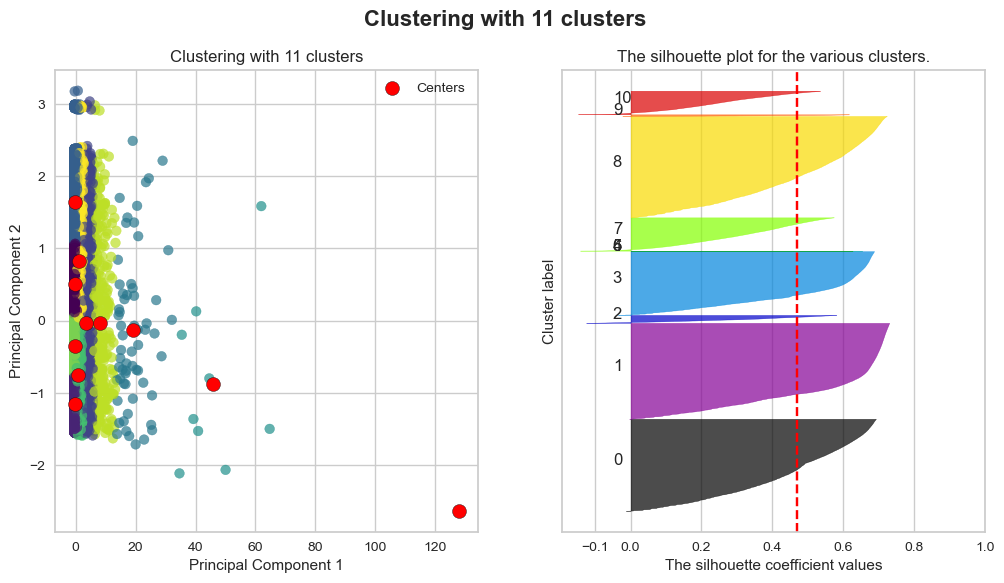

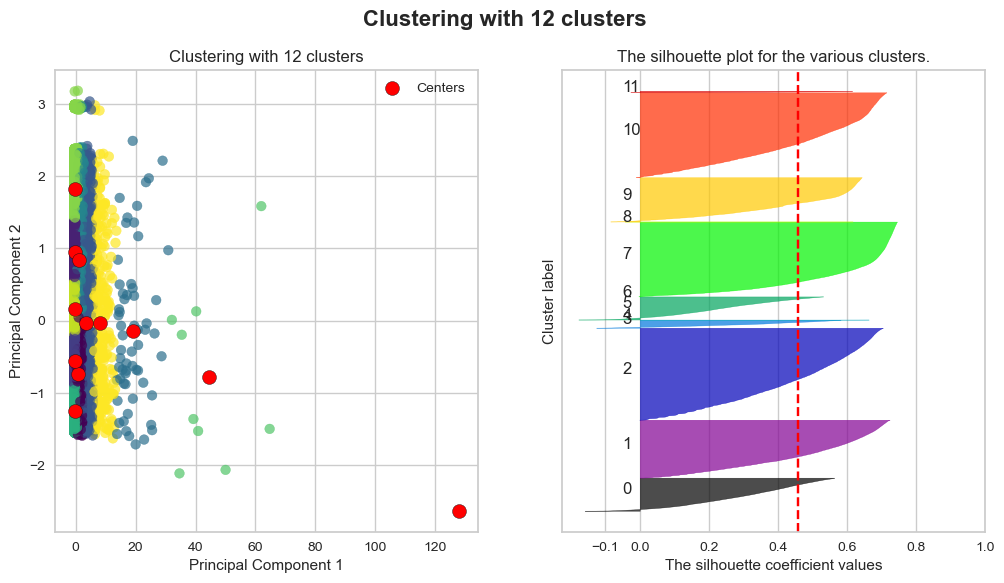

In [13]:
# Réduire la dimensionnalité à 2 avec PCA
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_scaled)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Liste pour stocker les scores de silhouette
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Créer une figure avec 1 ligne et 2 colonnes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Initialiser le clusterer avec la valeur n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_projected)

    # Tracé de la projection des données avec les clusters assignés
    ax1.scatter(X_projected[:, 0], X_projected[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
    centers = clusterer.cluster_centers_
    ax1.scatter(centers[:, 0], centers[:, 1], marker='o', c='red', s=100, edgecolors='k', label='Centers')
    ax1.legend()
    ax1.set_title(f'Clustering with {n_clusters} clusters')
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')

    # Calculer les scores de silhouette
    silhouette_avg = silhouette_score(X_projected, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculer les valeurs de silhouette pour chaque échantillon
    sample_silhouette_values = silhouette_samples(X_projected, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agréger les valeurs de silhouette pour les échantillons appartenant à
        # le cluster i, et les trier
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Étiqueter les tracés de silhouette avec leurs numéros de cluster au milieu
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calculer le nouveau y_lower pour le prochain tracé
        y_lower = y_upper + 10  # 10 pour les échantillons 0

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    # La ligne verticale pour le score de silhouette moyen de toutes les valeurs
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax2.set_yticks([])  # Effacer les étiquettes / marques yaxis
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(f"Clustering with {n_clusters} clusters", fontsize=16, fontweight='bold')

    plt.show()


In [254]:
# Données
X = X_scaled

# Hyperparamètres à tester
init_methods = ['k-means++', 'random']
n_inits = [5, 10, 15]
max_iters = [100, 200, 300]

best_score = -1  # Initialisation du meilleur score
best_params = {}  # Initialisation des meilleurs hyperparamètres

# Boucle sur les hyperparamètres
for init_method in init_methods:
    for n_init in n_inits:
        for max_iter in max_iters:
            # Création du modèle K-Means avec les hyperparamètres actuels
            kmeans = KMeans(n_clusters=5, init=init_method, n_init=n_init, max_iter=max_iter, random_state=0)
            
            # Entraînement du modèle
            kmeans.fit(X)
            
            # Calcul du score de silhouette
            silhouette_avg = silhouette_score(X, kmeans.labels_)
            
            # Mise à jour des meilleurs hyperparamètres si le score est meilleur
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'init_method': init_method, 'n_init': n_init, 'max_iter': max_iter}

print("Meilleurs hyperparamètres:", best_params)
print("Score de silhouette associé:", best_score)

Meilleurs hyperparamètres: {'init_method': 'k-means++', 'n_init': 5, 'max_iter': 100}
Score de silhouette associé: 0.4812838167688038


In [305]:
# Clustering par K-means 
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=5, max_iter= 100,random_state=19)
kmeans.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters_k = kmeans.labels_

# Renommer les clusters de 0 à 4 en 1 à 5
clusters_k += 1


In [306]:
# Ajouter le nombre de clusters aux données originelles
kmeans1clustered = pd.DataFrame(rfm_df, columns=rfm_df.columns, index=rfm_df.index)
kmeans1clustered['cluster'] = clusters_k

kmeans1clustered.head()

recency  frequency  monetary  cluster
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2      613          1    141.90        1
0000b849f77a49e4a4ce2b2a4ca5be3f      610          1     27.19        1
0000f46a3911fa3c0805444483337064      187          1     86.22        4
0000f6ccb0745a6a4b88665a16c9f078      403          1     43.62        4
0004aac84e0df4da2b147fca70cf8255      436          1    196.89        4

In [307]:
# Indexation par la colonne id
rfm_df10.set_index('customer_unique_id',inplace = True)
# Ajouter le nombre de clusters aux données originelles
kmeans1clustered_scaled = pd.DataFrame(X_scaled, columns=rfm_df10.columns, index=rfm_df10.index)
kmeans1clustered_scaled['cluster'] = clusters_k

kmeans1clustered_scaled.head()

recency  frequency  monetary  cluster
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2  0.825918  -0.280623 -0.113171        1
0000b849f77a49e4a4ce2b2a4ca5be3f  0.806330  -0.280623 -0.294816        1
0000f46a3911fa3c0805444483337064 -1.955553  -0.280623 -0.201341        4
0000f6ccb0745a6a4b88665a16c9f078 -0.545230  -0.280623 -0.268799        4
0004aac84e0df4da2b147fca70cf8255 -0.329764  -0.280623 -0.026094        4

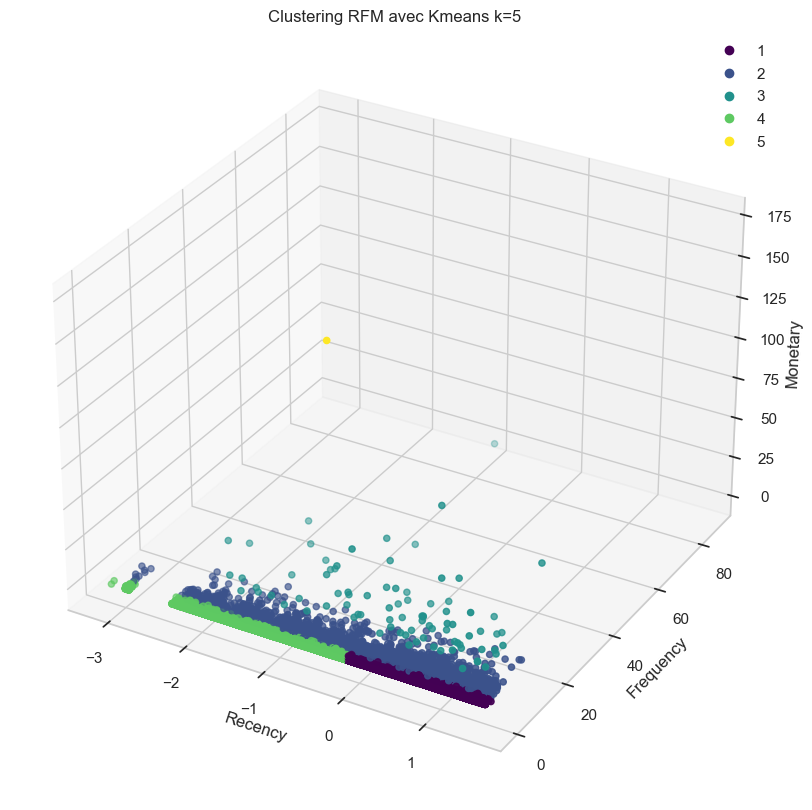

In [308]:
rfm_df2.set_index('customer_unique_id',inplace = True)
kmeans1clustered_scaled = pd.DataFrame(X_scaled, columns=rfm_df2.columns, index=rfm_df2.index)
kmeans1clustered_scaled['cluster'] = clusters_k

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmeans1clustered_scaled.iloc[:, 0],
                     kmeans1clustered_scaled.iloc[:, 1],
                     kmeans1clustered_scaled.iloc[:, 2],
                     c=clusters_k, cmap=plt.cm.viridis)

ax.legend(*scatter.legend_elements())
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary' )
ax.set_title('Clustering RFM avec Kmeans k=5')

plt.show()


### Analyse clusters

In [309]:
# Trouver les tailles des clusters
kmeans1clustered["cluster"].value_counts()

1    51549
4    37975
2     3784
3       86
5        1
Name: cluster, dtype: int64

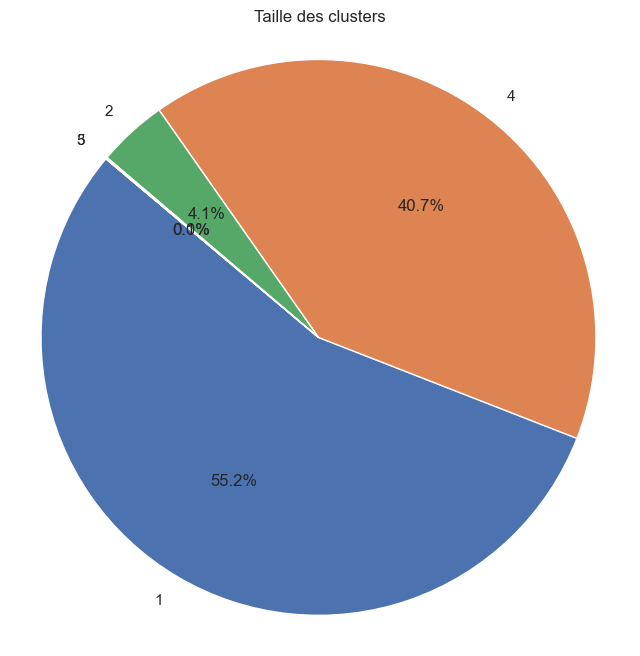

In [310]:
# Compter le nombre d'éléments dans chaque cluster
cluster_sizes_K1 = kmeans1clustered["cluster"].value_counts()

# Créer un camembert
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes_K1, labels=cluster_sizes_K1.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Pour que le camembert soit un cercle et non une ellipse
plt.title("Taille des clusters")
plt.show()

In [311]:
# Calcul de la moyenne des variables pour chaque cluster 
K_moy = kmeans1clustered.groupby('cluster').agg(['mean'])
K_moy.head()

recency  frequency       monetary
               mean       mean           mean
cluster                                      
1        596.877321   1.111913     169.416588
2        491.417283   3.893235     994.284334
3        489.093023  12.895349   10102.880814
4        336.188729   1.117604     169.948216
5        390.000000   8.000000  109312.640000

In [312]:
# Calcul de la moyenne des variables pour chaque cluster 
K_moy_scaled = kmeans1clustered_scaled.groupby('cluster').agg(['mean'])
K_moy_scaled.head()

recency  frequency    monetary
             mean       mean        mean
cluster                                 
1        0.720649  -0.148579   -0.069599
2        0.032071   3.133062    1.236588
3        0.016895  13.754524   15.660147
4       -0.981459  -0.141864   -0.068757
5       -0.630110   7.978574  172.759851

<Figure size 1300x1000 with 0 Axes>

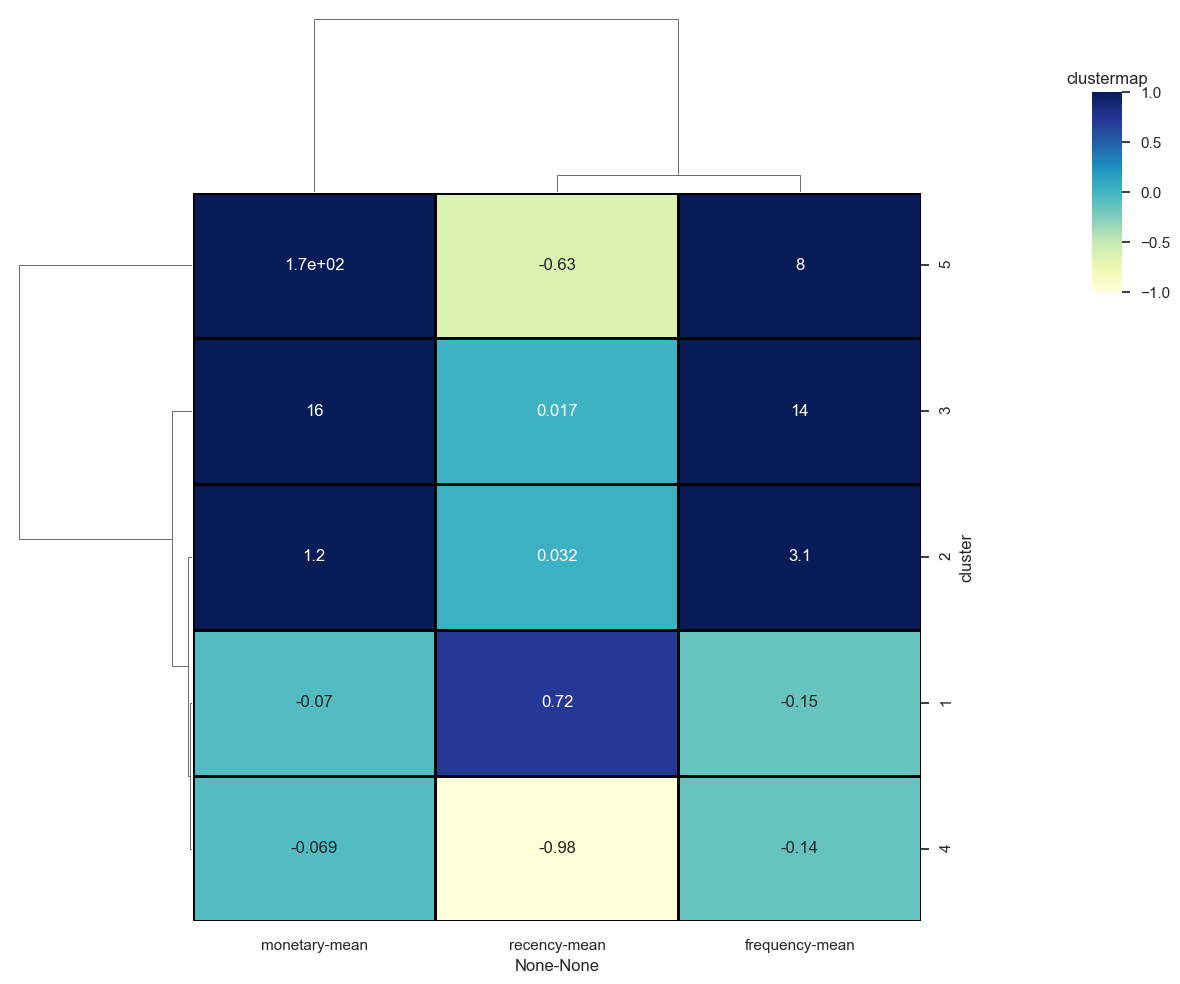

In [313]:
# Création d'une clustermap
plt.figure()
sns.set(rc={'figure.figsize':(13,10)})
sns.clustermap(K_moy_scaled,cmap ="YlGnBu", annot = True,linecolor='black',linewidths=1,vmin=-1, vmax=1,cbar_pos=(1.1, 0.7, .03, .2))
plt.title('clustermap')
plt.show()

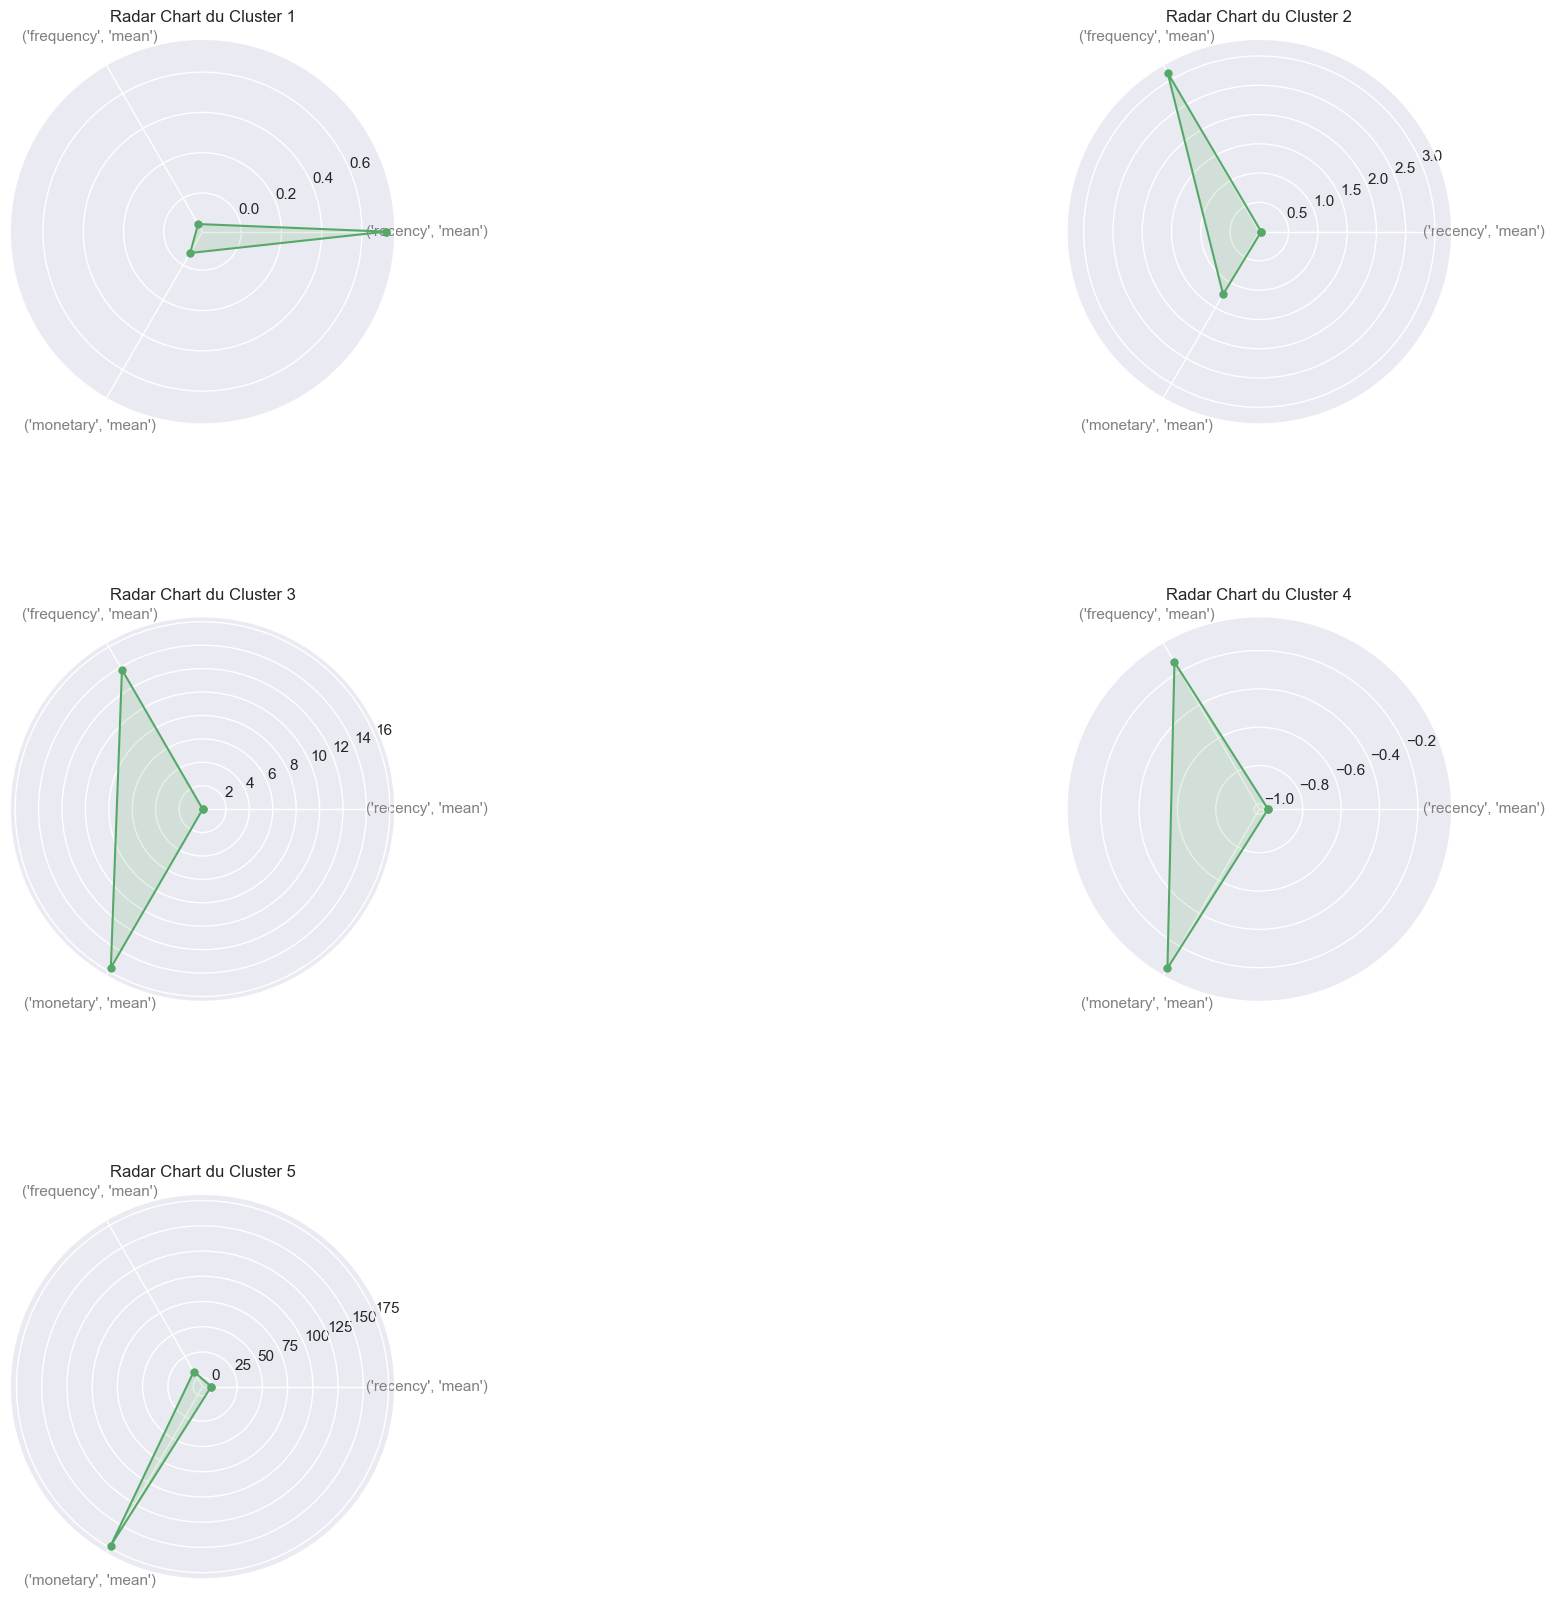

In [314]:
# Diagrammes de Kiviat :
fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.5) 
fig.tight_layout()

# Boucle pour créer un graphique en kiviat pour chaque cluster
for i in range(1, 6):
    cluster_data = K_moy_scaled[K_moy_scaled.index == i]
    ax = fig.add_subplot(3, 2, i, projection="polar")  # Trois graphiques par ligne, deux lignes au total
    
    variables = cluster_data.columns  # Utiliser les colonnes comme variables
    values = cluster_data.iloc[0].values.tolist()
    values.append(values[0])  # Ajouter la première valeur à la fin pour fermer la boucle
    
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la boucle
    
    l1, = ax.plot(angles, values, color="C2", marker="o", label="Variable")
    ax.fill(angles, values, 'green', alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, color='grey', size=11)
    ax.tick_params(pad=10)
    
    ax.set_title(f"Radar Chart du Cluster {i}")

plt.show()


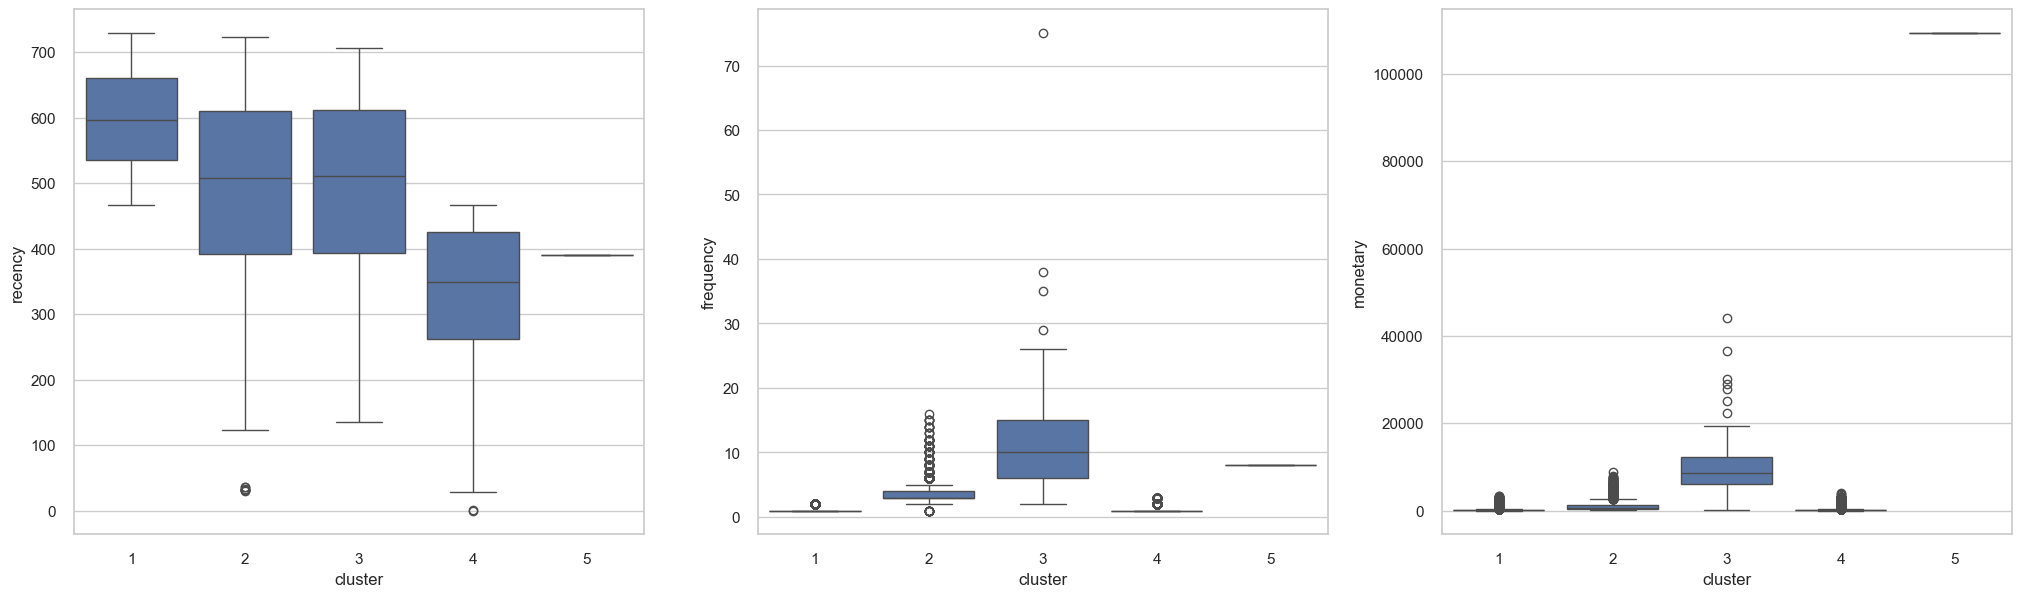

In [315]:
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

plt.subplot(2, 3, 1)
sns.boxplot(data=kmeans1clustered, x='cluster', y='recency')

plt.subplot(2, 3, 2)
sns.boxplot(data=kmeans1clustered, x='cluster', y='frequency')

plt.subplot(2, 3, 3)
sns.boxplot(data=kmeans1clustered, x='cluster', y='monetary')

plt.savefig("boxplots.png")
plt.show()


    Cluster 1 :
        Recency (récence) : Légèrement supérieur à la moyenne.
        Frequency (fréquence) : Légèrement inférieur à la moyenne.
        Monetary (montant) : Légèrement inférieur à la moyenne.
        Ce cluster represte des clients qui ont acheté relativement récemment, mais avec une fréquence et un montant légèrement en dessous de la moyenne.

    Cluster 2 :
        Recency : Proche de la moyenne.
        Frequency : Bien au-dessus de la moyenne.
        Monetary : Bien au-dessus de la moyenne.
        Ce cluster  représente des clients qui ont acheté récemment et de manière très fréquente, avec des montants significatifs.

    Cluster 3 :
        Recency : Proche de la moyenne.
        Frequency : Très élevé.
        Monetary : Très élevé.
        Ce cluster  correspond à des clients qui ont acheté récemment et de manière très fréquente, avec des montants très importants.

    Cluster 4 :
        Recency : Bien en dessous de la moyenne.
        Frequency : Légèrement en dessous de la moyenne.
        Monetary : Légèrement en dessous de la moyenne.
        Ce cluster pourrait représenter des clients qui n'ont pas acheté depuis un certain temps, avec une fréquence et un montant légèrement en dessous de la moyenne.

    Cluster 5 :
        Recency : Bien en dessous de la moyenne.
        Frequency : Élevé.
        Monetary : Très élevé.
        Ce cluster représente des clients qui n'ont pas acheté depuis un certain temps, mais qui ont réalisé des achats fréquents et de montants très élevés.

# simulation kmeans ('review_score', 'payment_installments')

In [316]:
# Sélectionner les colonnes spécifiques que vous souhaitez récupérer
df_reduit = df[['customer_unique_id', 'review_score', 'payment_installments']]

# Fusionner les deux DataFrames sur la colonne 'customer_unique_id'
rfm_df = rfm_df.merge(df_reduit, on='customer_unique_id', how='left')

# Afficher les premières lignes du DataFrame résultant pour vérifier
rfm_df.head()


customer_unique_id  recency  frequency  monetary  cluster  \
0  0000366f3b9a7992bf8c76cfdf3221e2      613          1    141.90        1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      610          1     27.19        1   
2  0000f46a3911fa3c0805444483337064      187          1     86.22        4   
3  0000f6ccb0745a6a4b88665a16c9f078      403          1     43.62        4   
4  0004aac84e0df4da2b147fca70cf8255      436          1    196.89        4   

   review_score  payment_installments  
0           5.0                   8.0  
1           4.0                   1.0  
2           3.0                   8.0  
3           4.0                   4.0  
4           5.0                   6.0

In [277]:
rfm_df3.to_csv(r'C:\Users\imane\Downloads\data_science\projet5\rfm.csv' , index=True)

In [317]:
rfm_df3=rfm_df.copy()

In [318]:
rfm_df9=rfm_df.copy()

In [328]:
# Indexation par la colonne id
rfm_df.set_index('customer_unique_id',inplace = True)

# Centrage et réduction des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm_df)


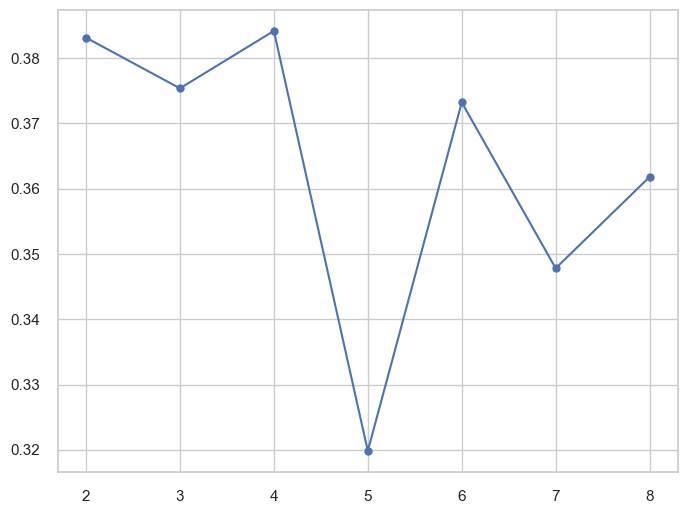

In [51]:
#coefficient de silhouette

#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
silhouettes = [] 
#Boucle itérative de 2 à 9 (clusters) pour tester les possibilités
for k in range(2, 9): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.figure(figsize=(8, 6)) 
plt.plot(range(2, 9), silhouettes, marker='o')
plt.show()

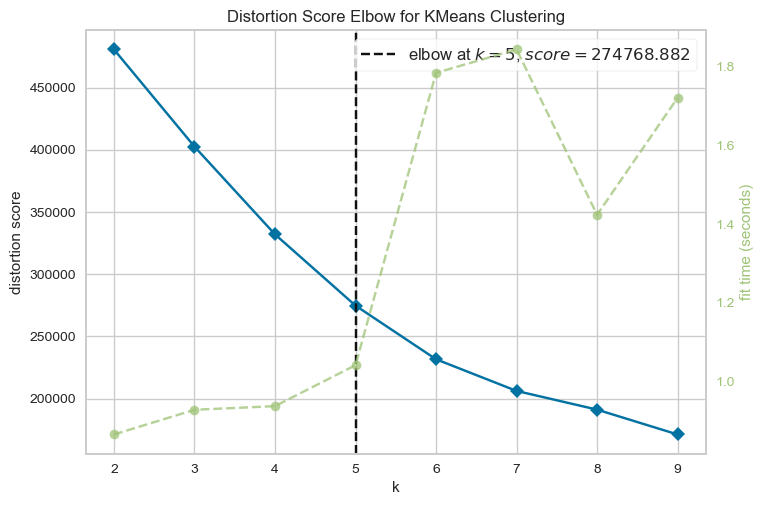

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()

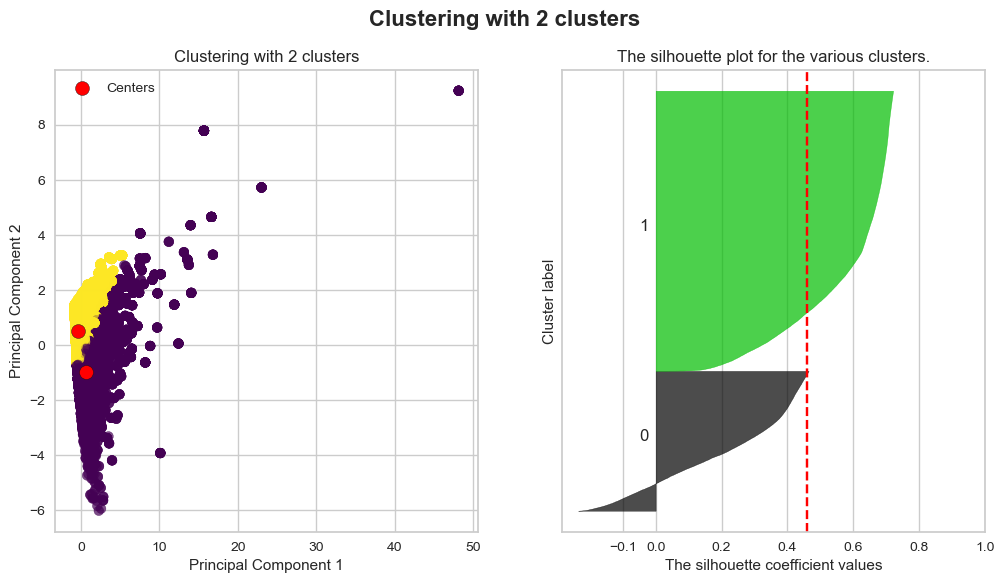

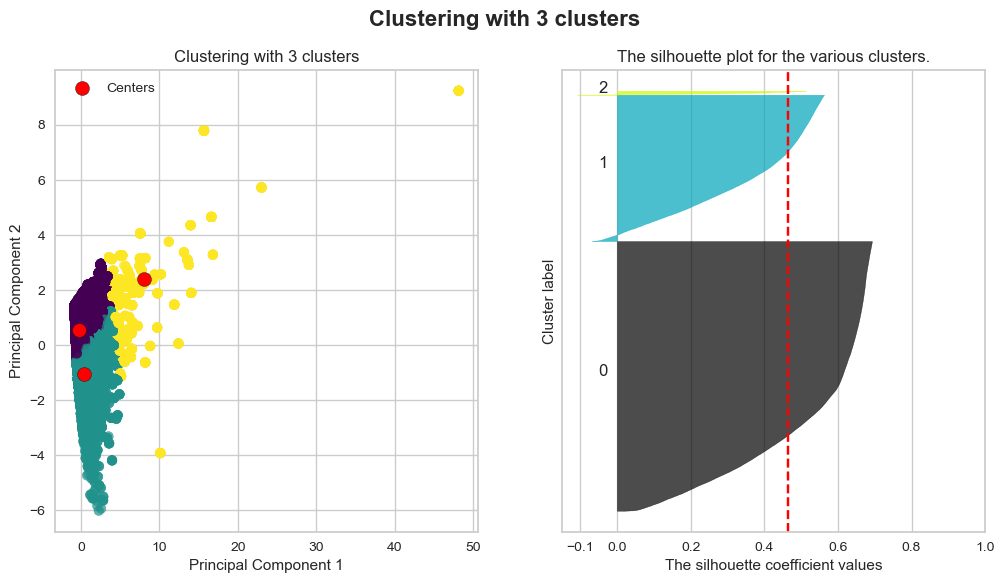

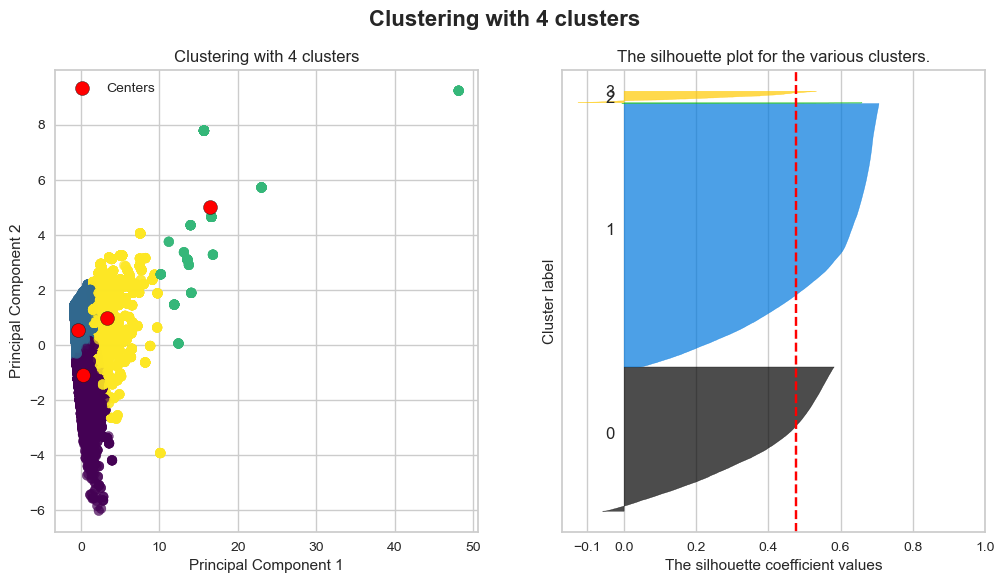

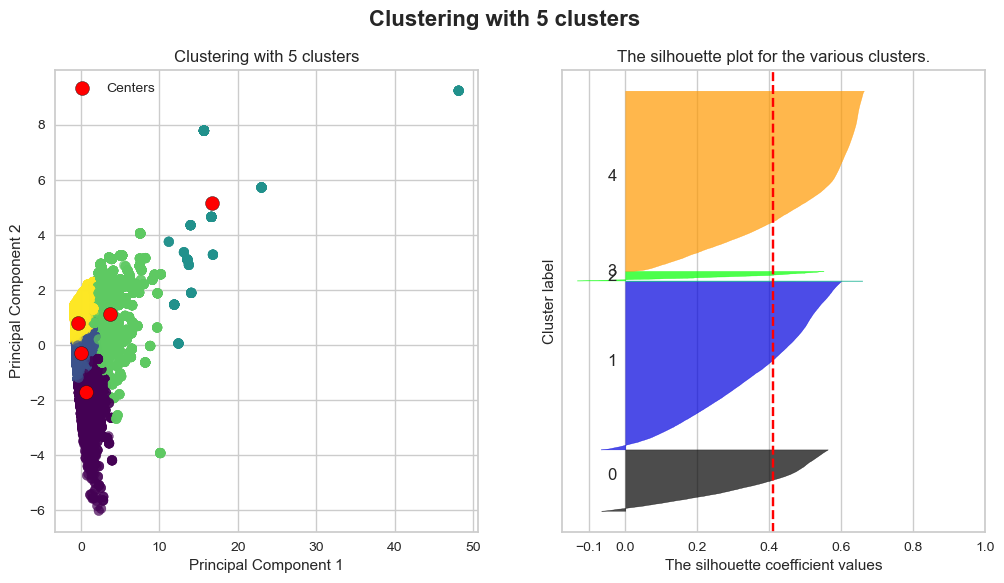

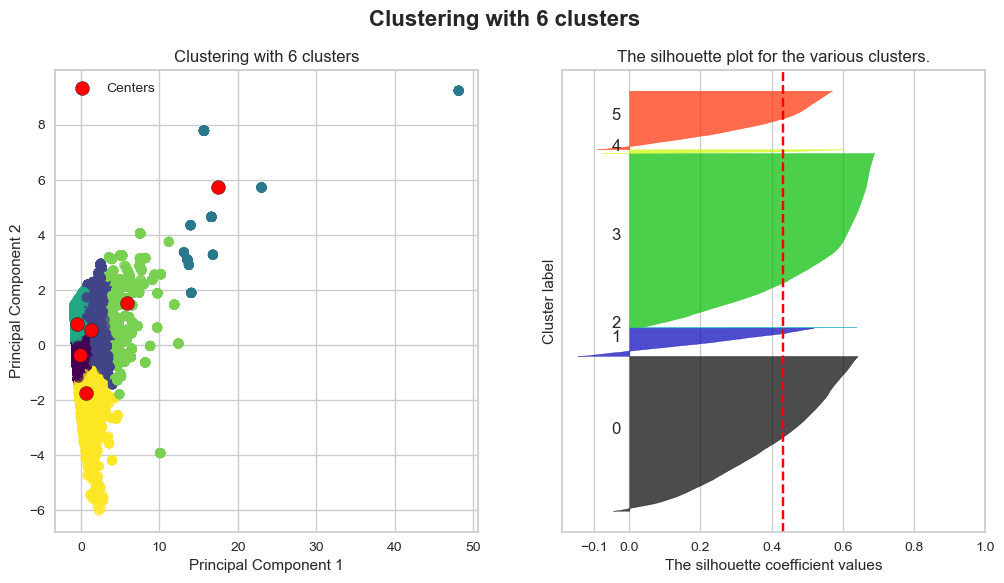

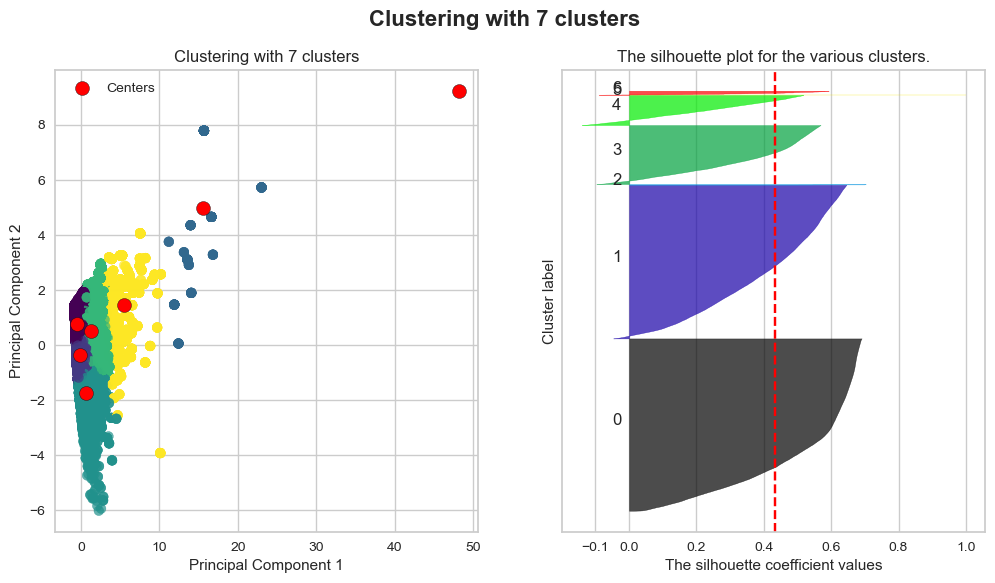

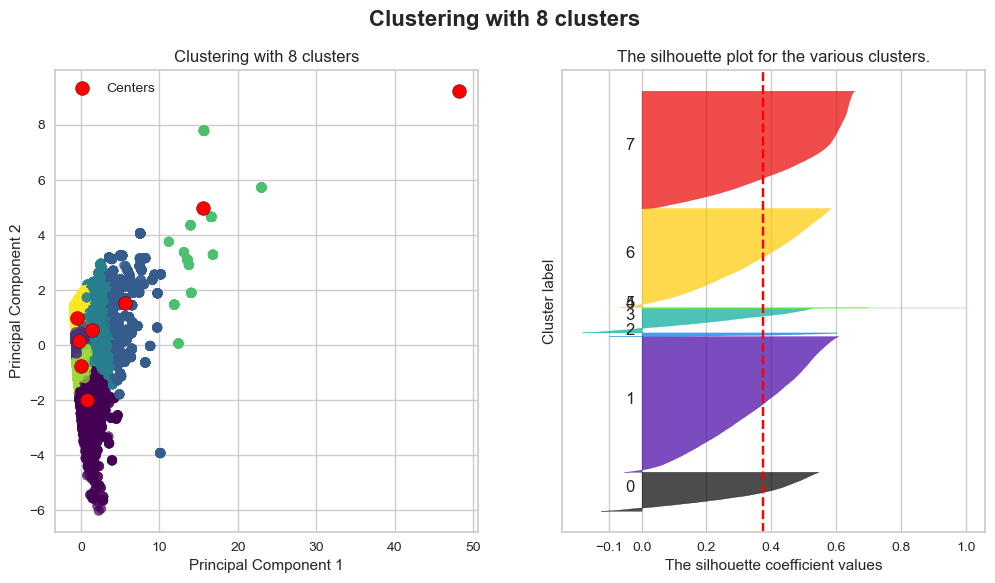

In [13]:
# Réduire la dimensionnalité à 2 avec PCA
pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_scaled)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Liste pour stocker les scores de silhouette
silhouette_scores = []

for n_clusters in range_n_clusters:
    # Créer une figure avec 1 ligne et 2 colonnes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Initialiser le clusterer avec la valeur n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_projected)

    # Tracé de la projection des données avec les clusters assignés
    ax1.scatter(X_projected[:, 0], X_projected[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
    centers = clusterer.cluster_centers_
    ax1.scatter(centers[:, 0], centers[:, 1], marker='o', c='red', s=100, edgecolors='k', label='Centers')
    ax1.legend()
    ax1.set_title(f'Clustering with {n_clusters} clusters')
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')

    # Calculer les scores de silhouette
    silhouette_avg = silhouette_score(X_projected, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculer les valeurs de silhouette pour chaque échantillon
    sample_silhouette_values = silhouette_samples(X_projected, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agréger les valeurs de silhouette pour les échantillons appartenant à
        # le cluster i, et les trier
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Étiqueter les tracés de silhouette avec leurs numéros de cluster au milieu
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calculer le nouveau y_lower pour le prochain tracé
        y_lower = y_upper + 10  # 10 pour les échantillons 0

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    # La ligne verticale pour le score de silhouette moyen de toutes les valeurs
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax2.set_yticks([])  # Effacer les étiquettes / marques yaxis
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(f"Clustering with {n_clusters} clusters", fontsize=16, fontweight='bold')

    plt.show()


In [329]:
# Définir les paramètres de KMeans
n_clusters = 4
init = 'k-means++'
n_init = 5
max_iter = 100
random_state = 19

# Créer une instance de KMeans avec les paramètres spécifiés
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=random_state)

# Entraîner le modèle KMeans sur les données
kmeans.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeans.labels_
# Renommer les clusters de 0 à 4 en 1 à 5
clusters += 1

In [ ]:
rfm_df = rfm_df.drop(columns=['cluster'])


In [332]:
# Ajouter le nombre de clusters aux données originelles
kmeans2clustered = pd.DataFrame(rfm_df, columns=rfm_df.columns, index=rfm_df.index)
kmeans2clustered['cluster'] = clusters

kmeans2clustered.head()

recency  frequency  monetary  review_score  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      613          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      610          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      187          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      403          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      436          1    196.89           5.0   

                                  payment_installments  cluster  
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                   8.0        4  
0000b849f77a49e4a4ce2b2a4ca5be3f                   1.0        4  
0000f46a3911fa3c0805444483337064                   8.0        1  
0000f6ccb0745a6a4b88665a16c9f078                   4.0        1  
0004aac84e0df4da2b147fca70cf8255                   6.0        1

In [338]:
kmeans2clustered_scaled

recency  frequency  monetary  cluster  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2  0.830948  -0.285988 -0.148913        4   
0000b849f77a49e4a4ce2b2a4ca5be3f  0.811359  -0.285988 -0.221619        4   
0000f46a3911fa3c0805444483337064 -1.950729  -0.285988 -0.184204        2   
0000f6ccb0745a6a4b88665a16c9f078 -0.540301  -0.285988 -0.211205        4   
0004aac84e0df4da2b147fca70cf8255 -0.324819  -0.285988 -0.114058        4   
...                                    ...        ...       ...      ...   
fffcf5a5ff07b0908bd4e2dbc735a684 -1.363051   0.063569  2.381929        2   
fffea47cd6d3cc0a88bd621562a9d061 -0.155046  -0.285988 -0.185244        4   
ffff371b4d645b6ecea244b27531430a -2.153152  -0.285988 -0.167572        2   
ffff5962728ec6157033ef9805bacc48  0.778710  -0.285988 -0.154116        4   
ffffd2657e2aad2907e67c3e9daecbeb -1.604652  -0.285988 -0.193496        2   

                                  review_score  payment_installments  
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2      0.696891              1.817264  
0000b849f77a49e4a4ce2b2a4ca5be3f     -0.024828             -0.699808  
0000f46a3911fa3c0805444483337064     -0.746547              1.817264  
0000f6ccb0745a6a4b88665a16c9f078     -0.024828              0.378937  
0004aac84e0df4da2b147fca70cf8255      0.696891              1.098101  
...                                        ...                   ...  
fffcf5a5ff07b0908bd4e2dbc735a684      0.696891              2.536427  
fffea47cd6d3cc0a88bd621562a9d061     -0.024828             -0.699808  
ffff371b4d645b6ecea244b27531430a      0.696891             -0.699808  
ffff5962728ec6157033ef9805bacc48      0.696891              0.738519  
ffffd2657e2aad2907e67c3e9daecbeb      0.696891              0.378937  

[115608 rows x 6 columns]

In [340]:
rfm_df = rfm_df.drop(columns=['cluster'])


In [341]:
# Indexation par la colonne id
#rfm_df9.set_index('customer_unique_id',inplace = True)
# Ajouter le nombre de clusters aux données originelles
kmeans2clustered_scaled = pd.DataFrame(X_scaled, columns=rfm_df.columns, index=rfm_df.index)
kmeans2clustered_scaled['cluster'] = clusters

kmeans2clustered_scaled.head()

recency  frequency  monetary  review_score  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2  0.830948  -0.285988 -0.148913      0.696891   
0000b849f77a49e4a4ce2b2a4ca5be3f  0.811359  -0.285988 -0.221619     -0.024828   
0000f46a3911fa3c0805444483337064 -1.950729  -0.285988 -0.184204     -0.746547   
0000f6ccb0745a6a4b88665a16c9f078 -0.540301  -0.285988 -0.211205     -0.024828   
0004aac84e0df4da2b147fca70cf8255 -0.324819  -0.285988 -0.114058      0.696891   

                                  payment_installments  cluster  
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2              1.817264        4  
0000b849f77a49e4a4ce2b2a4ca5be3f             -0.699808        4  
0000f46a3911fa3c0805444483337064              1.817264        1  
0000f6ccb0745a6a4b88665a16c9f078              0.378937        1  
0004aac84e0df4da2b147fca70cf8255              1.098101        1

### Analyse clusters

In [342]:
# Trouver les tailles des clusters
kmeans2clustered["cluster"].value_counts()

4    55563
1    37055
2    21981
3     1009
Name: cluster, dtype: int64

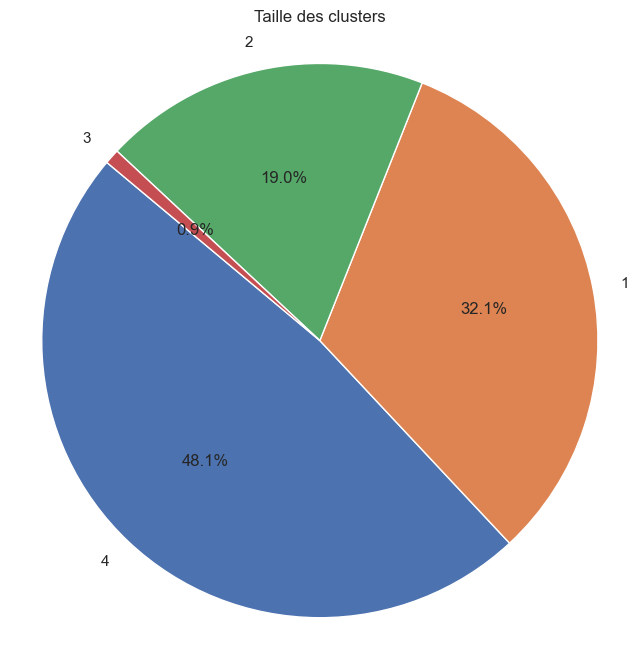

In [343]:
# Compter le nombre d'éléments dans chaque cluster
cluster_sizes_K1 = kmeans2clustered["cluster"].value_counts()

# Créer un camembert
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes_K1, labels=cluster_sizes_K1.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Pour que le camembert soit un cercle et non une ellipse
plt.title("Taille des clusters")
plt.show()

In [344]:
# Calcul de la moyenne des variables pour chaque cluster 
K_moy = kmeans2clustered.groupby('cluster').agg(['mean'])
K_moy.head()

recency  frequency     monetary review_score payment_installments
               mean       mean         mean         mean                 mean
cluster                                                                      
1        323.266955   1.604156   282.638952     4.616651             3.412252
2        488.185751   1.944998   450.491581     1.530822             3.360812
3        449.539148  22.036670  9006.471051     3.121903             3.054509
4        593.792470   1.543509   253.817836     4.653096             2.469341

In [345]:
# Calcul de la moyenne des variables pour chaque cluster 
K_moy_scaled = kmeans2clustered_scaled.groupby('cluster').agg(['mean'])
K_moy_scaled.head()

recency frequency  monetary review_score payment_installments
             mean      mean      mean         mean                 mean
cluster                                                                
1       -1.060939 -0.074801 -0.059708     0.420221             0.167594
2        0.015941  0.044343  0.046682    -1.806880             0.149097
3       -0.236412  7.067526  5.469711    -0.658567             0.038956
4        0.705528 -0.096001 -0.077976     0.446524            -0.171459

<Figure size 1300x1000 with 0 Axes>

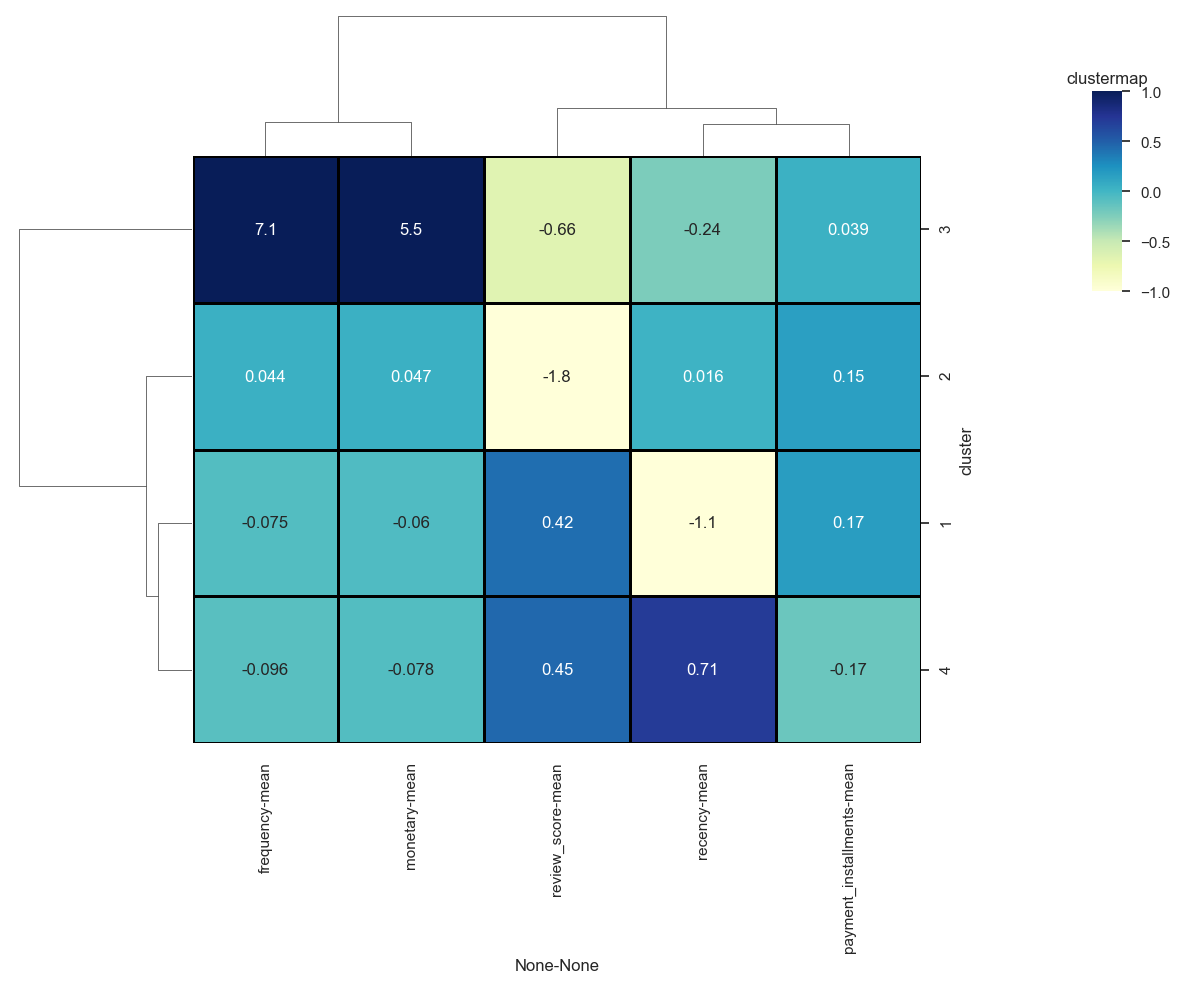

In [346]:
# Création d'une clustermap
plt.figure()
sns.set(rc={'figure.figsize':(13,10)})
sns.clustermap(K_moy_scaled,cmap ="YlGnBu", annot = True,linecolor='black',linewidths=1,vmin=-1, vmax=1,cbar_pos=(1.1, 0.7, .03, .2))
plt.title('clustermap')
plt.show()

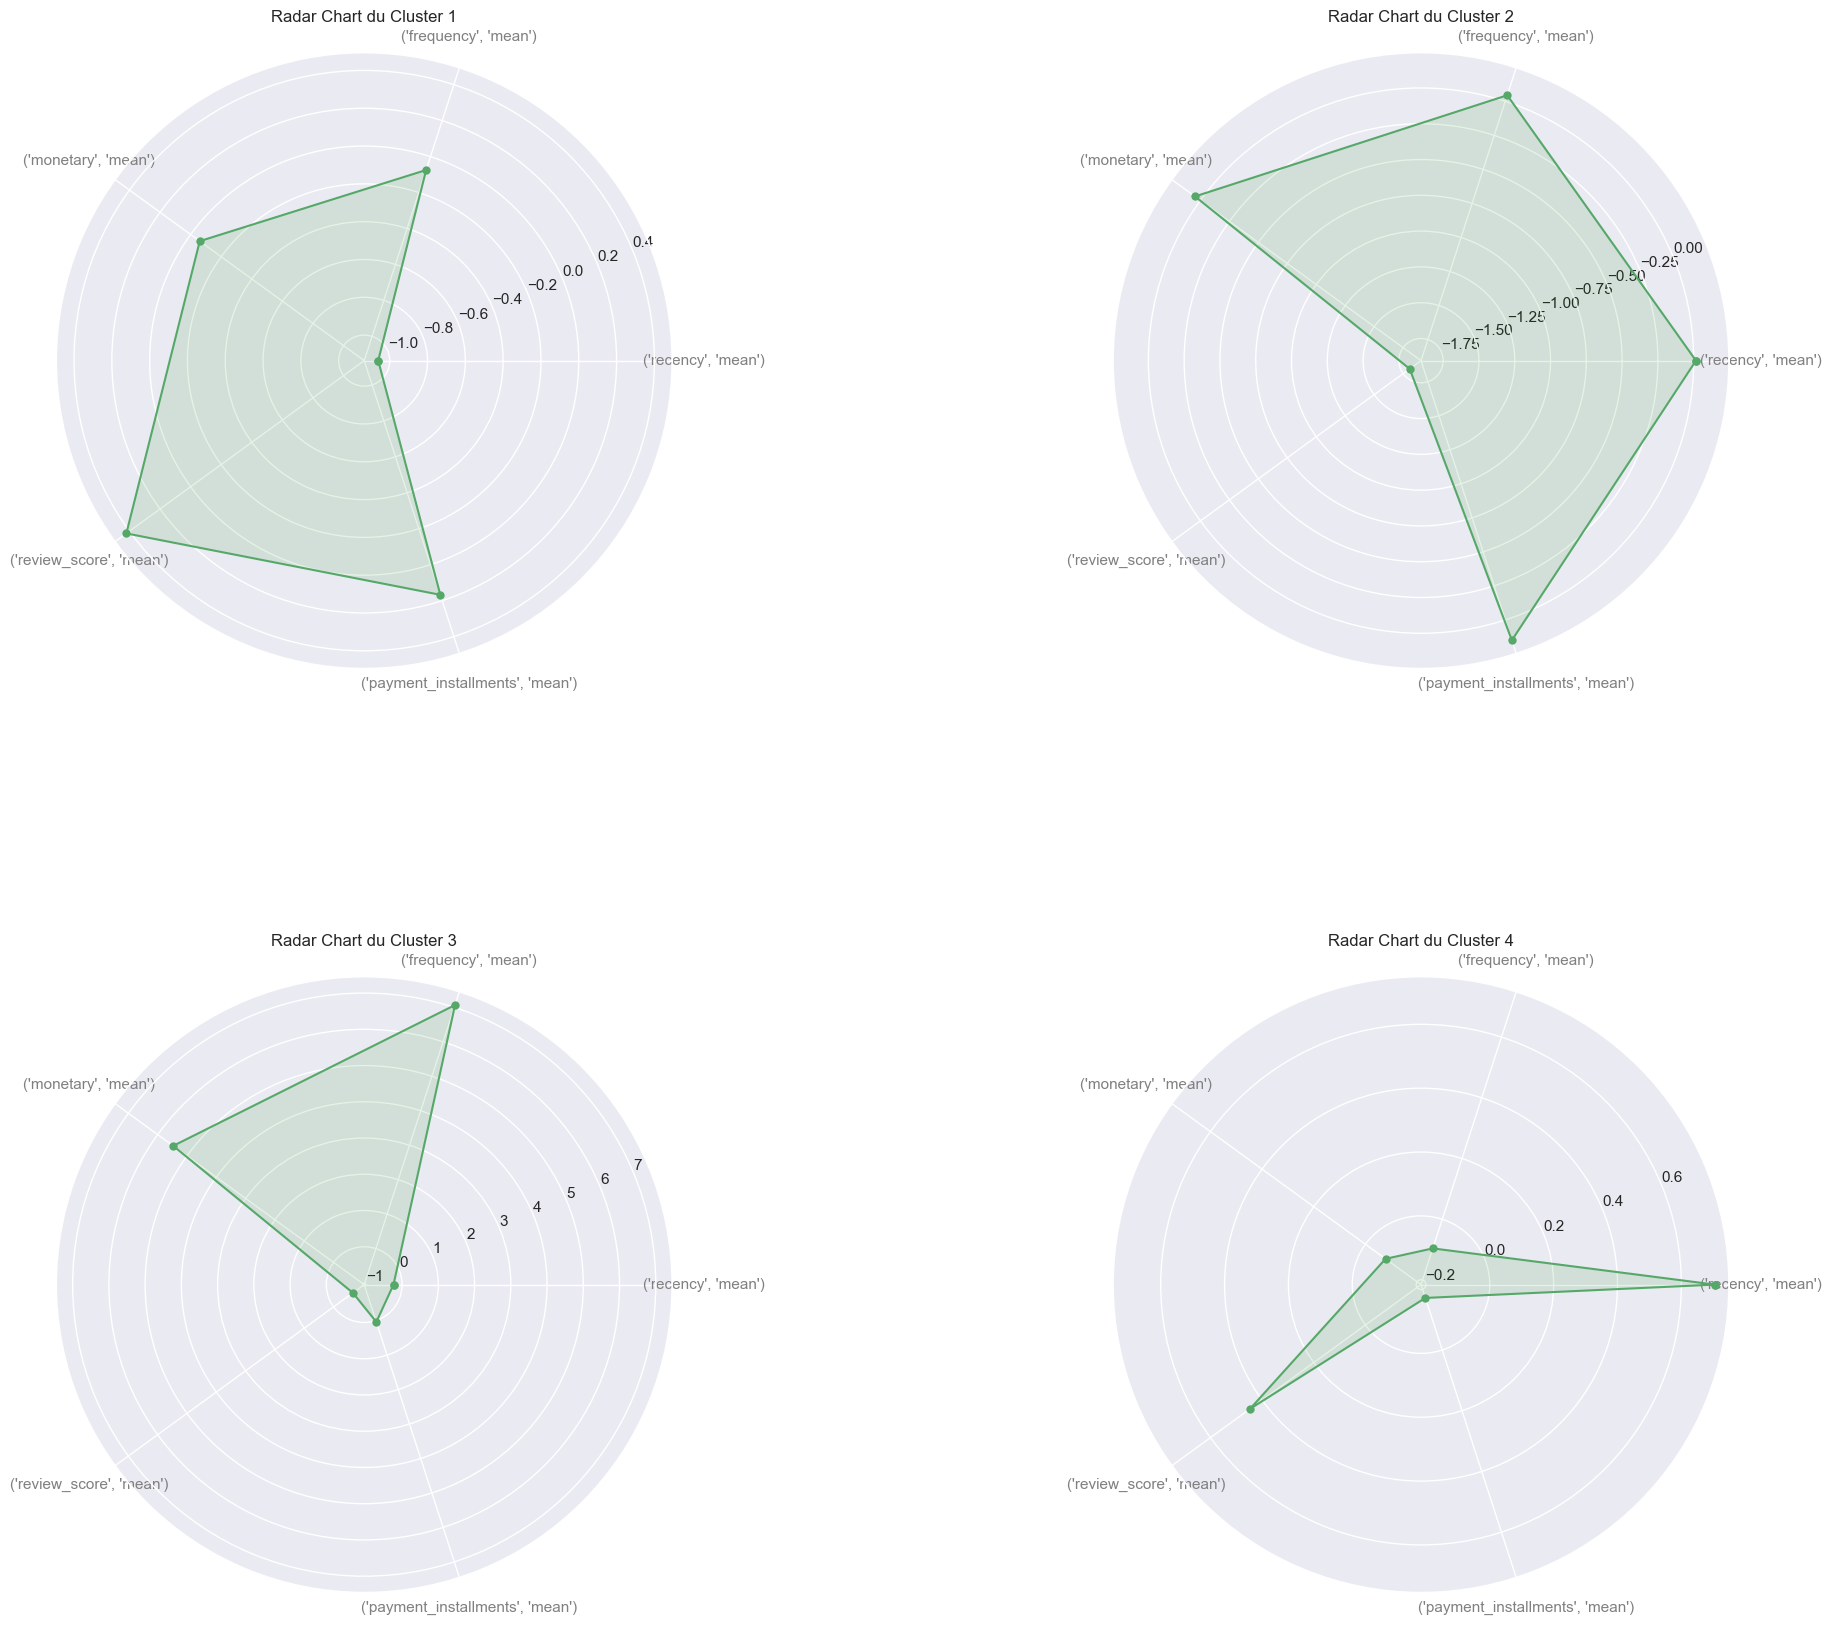

In [347]:
# Diagrammes de Kiviat :
fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.5) 
fig.tight_layout()

# Boucle pour créer un graphique en kiviat pour chaque cluster
for i in range(1, 5):  # Modification ici pour 4 clusters
    cluster_data = K_moy_scaled[K_moy_scaled.index == i]
    ax = fig.add_subplot(2, 2, i, projection="polar")  # Deux graphiques par ligne, deux lignes au total
    
    variables = cluster_data.columns  # Utiliser les colonnes comme variables
    values = cluster_data.iloc[0].values.tolist()
    values.append(values[0])  # Ajouter la première valeur à la fin pour fermer la boucle
    
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la boucle
    
    l1, = ax.plot(angles, values, color="C2", marker="o", label="Variable")
    ax.fill(angles, values, 'green', alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, color='grey', size=11)
    ax.tick_params(pad=10)
    
    ax.set_title(f"Radar Chart du Cluster {i}")

plt.show()


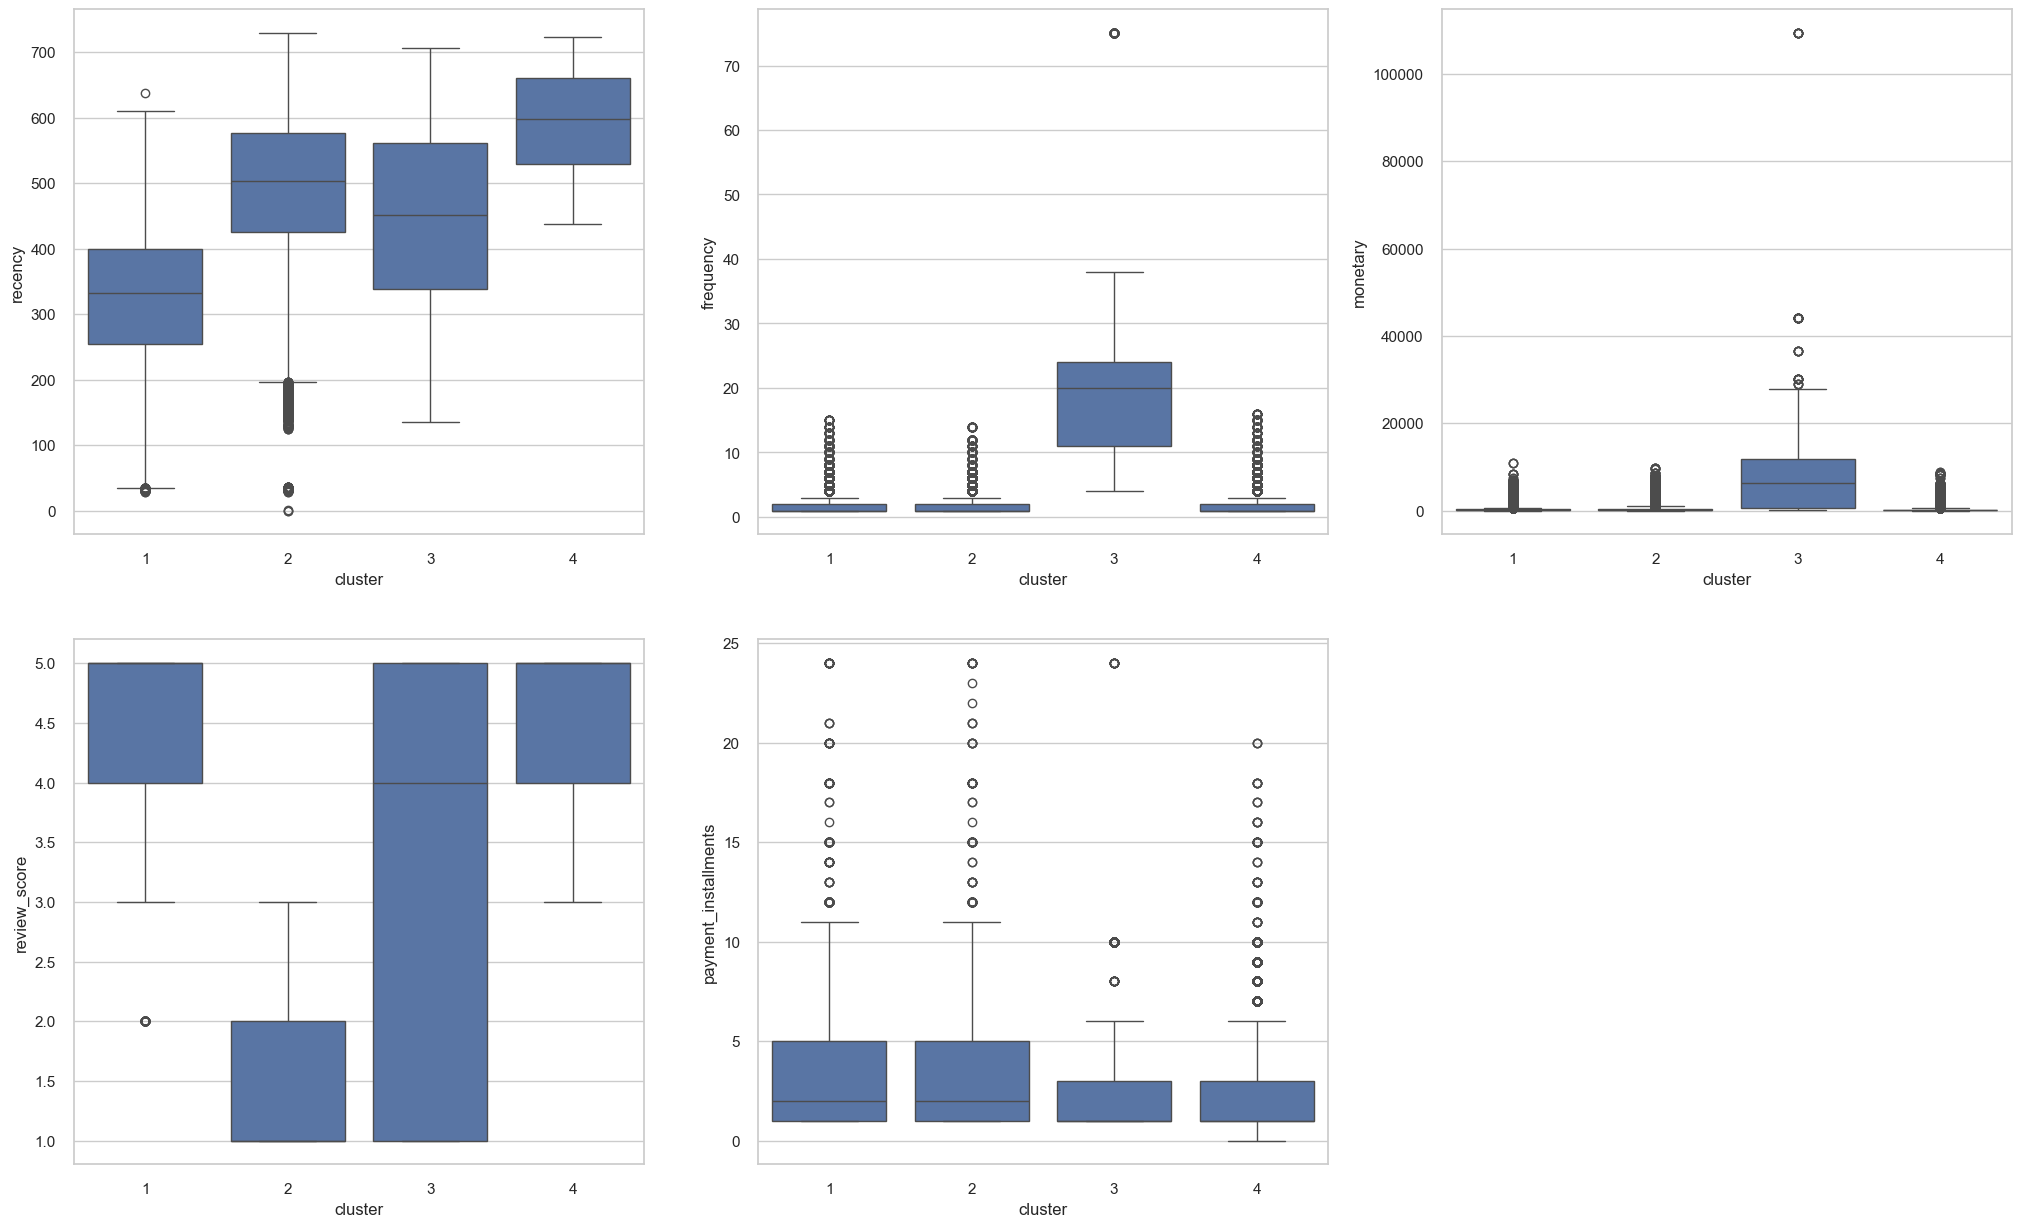

In [348]:
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

plt.subplot(2, 3, 1)
sns.boxplot(data=kmeans2clustered, x='cluster', y='recency')

plt.subplot(2, 3, 2)
sns.boxplot(data=kmeans2clustered, x='cluster', y='frequency')

plt.subplot(2, 3, 3)
sns.boxplot(data=kmeans2clustered, x='cluster', y='monetary')

plt.subplot(2, 3, 4)  # Ajout de la première colonne supplémentaire
sns.boxplot(data=kmeans2clustered, x='cluster', y='review_score')

plt.subplot(2, 3, 5)  # Ajout de la deuxième colonne supplémentaire
sns.boxplot(data=kmeans2clustered, x='cluster', y= 'payment_installments')

plt.savefig("boxplots.png")
plt.show()



    Cluster 1 :
        Recency (récence) : Faible
        Frequency (fréquence) : Faible
        Monetary (montant) : Faible
        Review Score (score de révision) : Moyen à élevé
        Payment Installments (paiements échelonnés) : Moyen à élevé

    Ce cluster comprend des clients qui ont effectué des achats récemment mais avec une faible fréquence et un faible montant. Cependant, ils ont tendance à donner des scores de révision moyens à élevés et utilisent souvent des paiements échelonnés.

    Cluster 2 :
        Recency : Moyenne
        Frequency : Moyenne
        Monetary : Moyenne
        Review Score : Faible
        Payment Installments : Moyen à élevé

    Ce cluster regroupe des clients dont les achats sont de taille moyenne et de fréquence moyenne. Cependant, ils ont tendance à donner des scores de révision faibles mais utilisent souvent des paiements échelonnés.

    Cluster 3 :
        Recency : Moyenne à élevée
        Frequency : Élevée
        Monetary : Élevé
        Review Score : Moyen
        Payment Installments : Faible à moyen

    Ce cluster comprend des clients qui ont effectué des achats récemment, de manière fréquente et avec un montant élevé. Leurs scores de révision sont moyens, mais ils ont tendance à utiliser moins souvent des paiements échelonnés.

    Cluster 4 :
        Recency : Élevée
        Frequency : Faible
        Monetary : Faible
        Review Score : Moyen à élevé
        Payment Installments : Faible à moyen

    Ce cluster regroupe des clients dont les achats sont moins fréquents et de montant faible. Ils ont tendance à donner des scores de révision moyens à élevés et à utiliser rarement des paiements échelonnés.





## Classification ascendante hiérarchique

In [223]:
# Convertir le tableau numpy en DataFrame avec les vrais noms de colonnes
df2 = pd.DataFrame(rfm_df, columns=rfm_df.columns)

# Réduire la taille de l'échantillon 
donnees_echantillonnees = df2.sample(n=30000, random_state=2)



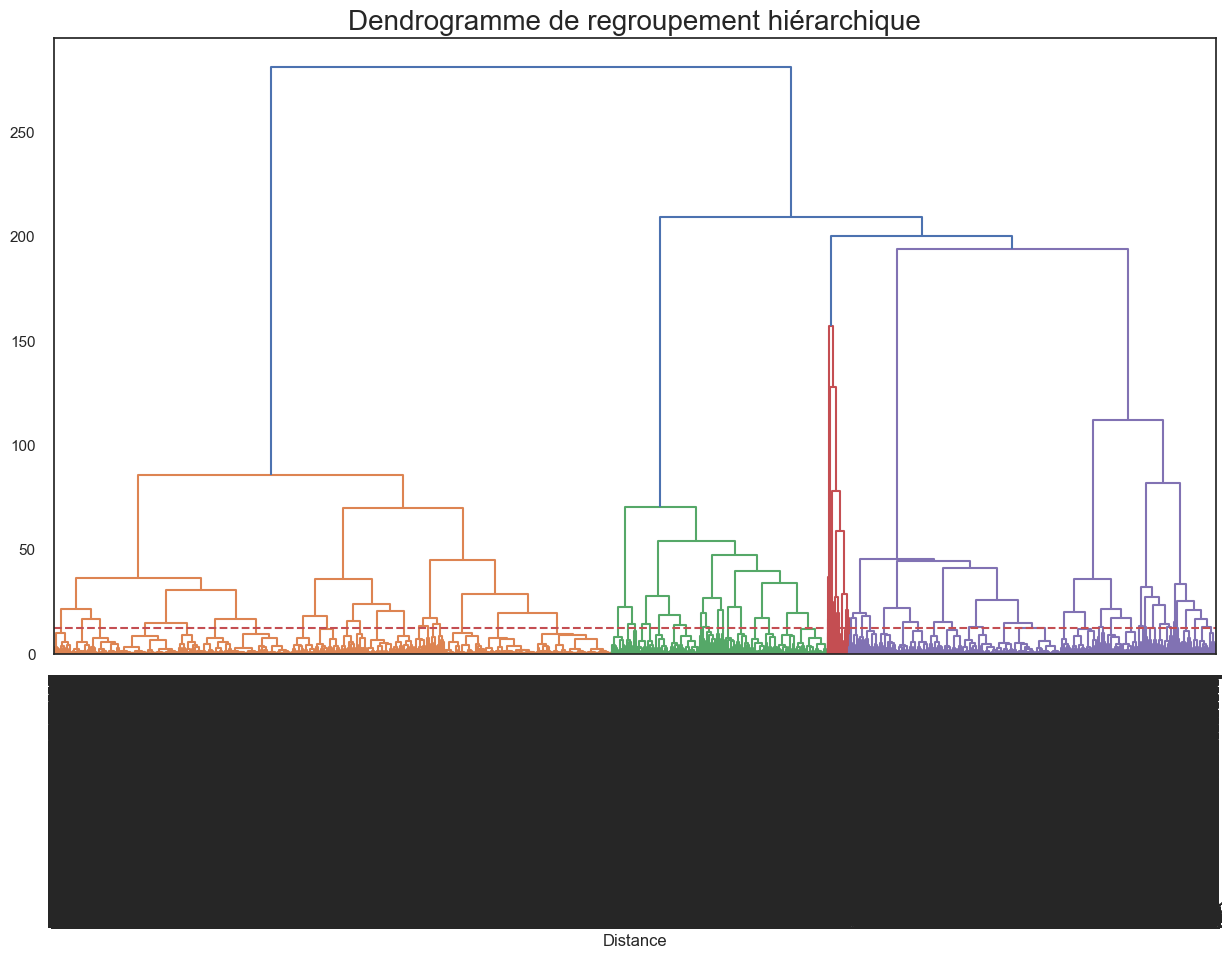

In [64]:
# Création de la pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Étape de mise à l'échelle
])

# Transformation des données
donnees_echantillonnees_transformees = pipeline.fit_transform(donnees_echantillonnees)

# Afficher les statistiques des données transformées
idx = ["mean", "std"]
pd.DataFrame(donnees_echantillonnees_transformees).describe().round(2).loc[idx, :]

# Affichage d'un dendrogramme
fig = plt.figure(figsize=(15, 8))  # Réduire la taille de la figure
sns.set_style('white')
plt.title('Dendrogramme de regroupement hiérarchique', fontsize=20)
plt.xlabel('Distance')

def pays(id):
    return '[%s]' % (donnees_echantillonnees.index[id])  # Utiliser l'index des données échantillonnées

Z = linkage(donnees_echantillonnees_transformees, method='ward', metric='euclidean')  # Utiliser les données échantillonnées pour le dendrogramme

dendrogram(Z, leaf_font_size=10, leaf_label_func=pays, orientation='top')

plt.axhline(y=12, color='r', linestyle='--')

plt.show()

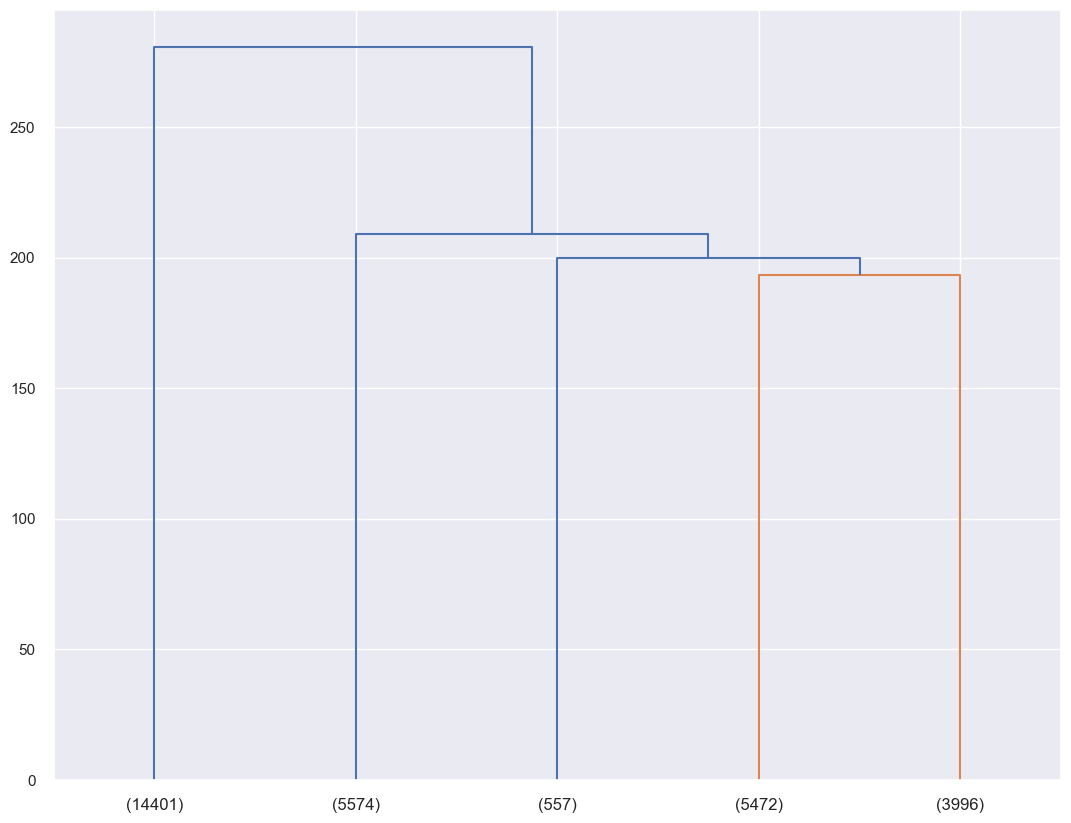

In [224]:
dendrogram(Z,truncate_mode="lastp",p=5)
plt.show()

In [225]:
# Création d'une colonne "cluster"

clusters = fcluster(Z, 5, criterion='maxclust')

# Créer le DataFrame clients_clustered en utilisant l'échantillon
clients_clustered = pd.DataFrame(donnees_echantillonnees, columns=donnees_echantillonnees.columns)
clients_clustered['Cluster'] = clusters

clients_clustered.head()



recency  frequency  monetary  cluster  \
customer_unique_id                                                        
ab1d731d10eee8bf32306f5452eb770f      696          5   1449.50        1   
c398a258ca1af5f3da8ae5504e24828e      463          1    276.65        4   
2b242c41ff41dd94d733c61d9edd5bef      446          1     61.77        4   
e9b87dccd9c326a3325385087eb0150c      396          4    722.61        2   
c68c8c2217bb842d2dab9331ae200f07      377          1     47.53        1   

                                  review_score  payment_installments  Cluster  
customer_unique_id                                                             
ab1d731d10eee8bf32306f5452eb770f           1.0                   5.0        2  
c398a258ca1af5f3da8ae5504e24828e           5.0                   1.0        1  
2b242c41ff41dd94d733c61d9edd5bef           5.0                   1.0        1  
e9b87dccd9c326a3325385087eb0150c           5.0                   3.0        4  
c68c8c2217bb842d2dab9331ae200f07           2.0                   1.0        2

In [226]:
clients_clustered.drop(columns=['cluster'], inplace=True)


In [227]:
donnees_echantillonnees

recency  frequency  monetary  cluster  \
customer_unique_id                                                        
ab1d731d10eee8bf32306f5452eb770f      696          5   1449.50        1   
c398a258ca1af5f3da8ae5504e24828e      463          1    276.65        4   
2b242c41ff41dd94d733c61d9edd5bef      446          1     61.77        4   
e9b87dccd9c326a3325385087eb0150c      396          4    722.61        2   
c68c8c2217bb842d2dab9331ae200f07      377          1     47.53        1   
...                                   ...        ...       ...      ...   
4578c59d3730444c9221fb635f7af881      578          1    119.74        1   
be4d9d478982283077c4310a809c350d      527          1     83.41        1   
20225309debb0a9e1031b180d6133758      568          1    101.00        4   
25f3cf83109f636d52d288fa4e797111      539          5    210.55        4   
a1bb96820529725c3c79a77c69e7e792      278          9    133.69        1   

                                  review_score  payment_installments  Cluster  
customer_unique_id                                                             
ab1d731d10eee8bf32306f5452eb770f           1.0                   5.0        2  
c398a258ca1af5f3da8ae5504e24828e           5.0                   1.0        1  
2b242c41ff41dd94d733c61d9edd5bef           5.0                   1.0        1  
e9b87dccd9c326a3325385087eb0150c           5.0                   3.0        4  
c68c8c2217bb842d2dab9331ae200f07           2.0                   1.0        2  
...                                        ...                   ...      ...  
4578c59d3730444c9221fb635f7af881           1.0                   8.0        5  
be4d9d478982283077c4310a809c350d           1.0                   1.0        2  
20225309debb0a9e1031b180d6133758           5.0                   1.0        1  
25f3cf83109f636d52d288fa4e797111           4.0                   1.0        1  
a1bb96820529725c3c79a77c69e7e792           1.0                   1.0        2  

[30000 rows x 7 columns]

In [228]:
donnees_echantillonnees.drop(columns=['Cluster'], inplace=True)
donnees_echantillonnees.drop(columns=['cluster'], inplace=True)


# Centrage et réduction des données
scaler = StandardScaler()
X_scaled_echantillonnees = scaler.fit_transform(donnees_echantillonnees)
# Créer le DataFrame clients_clustered en utilisant l'échantillon
clients_clustered_scaled = pd.DataFrame(X_scaled_echantillonnees, columns=donnees_echantillonnees.columns)
clients_clustered_scaled['Cluster2'] = clusters

clients_clustered_scaled.head()

recency  frequency  monetary  review_score  payment_installments  Cluster2
0  1.382497   1.166719  0.660668     -2.183082              0.737075         2
1 -0.136245  -0.295900 -0.071165      0.696119             -0.701775         1
2 -0.247055  -0.295900 -0.205246      0.696119             -0.701775         1
3 -0.572965   0.801064  0.207104      0.696119              0.017650         4
4 -0.696811  -0.295900 -0.214131     -1.463281             -0.701775         2

### Analyse clusters

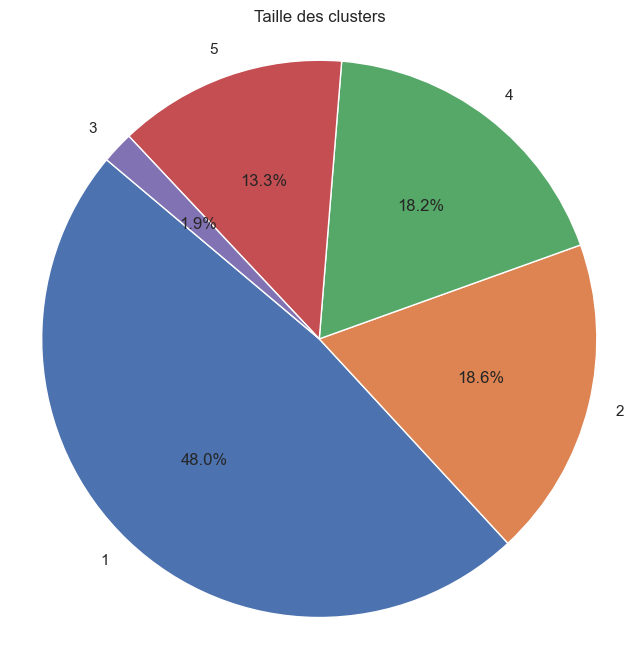

In [71]:
# Compter le nombre d'éléments dans chaque cluster
cluster_sizes_cah = clients_clustered["Cluster"].value_counts()

# Créer un camembert
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes_cah, labels=cluster_sizes_cah.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Pour que le camembert soit un cercle et non une ellipse
plt.title("Taille des clusters")
plt.show()

In [72]:
# Calcul de la moyenne des variables pour chaque cluster 
df_clusters_moy = clients_clustered.groupby('Cluster').agg(['mean'])
df_clusters_moy.head()

recency  frequency     monetary review_score payment_installments
               mean       mean         mean         mean                 mean
Cluster                                                                      
1        560.152489   1.396292   189.228440     4.750017             1.967849
2        504.591137   1.793326   324.322494     1.757983             2.199318
3        477.475763  14.718133  6273.348294     3.651706             2.597846
4        274.834613   1.639803   250.995066     4.562135             2.064327
5        467.435686   1.752252   580.698604     3.950200             8.805556

In [229]:
# Calcul de la moyenne des variables pour chaque cluster 
df_clusters_moy_scaled = clients_clustered_scaled.groupby('Cluster2').agg(['mean'])
df_clusters_moy_scaled.head()

recency frequency  monetary review_score payment_installments
              mean      mean      mean         mean                 mean
Cluster2                                                                
1         0.497014 -0.150994 -0.125715     0.516181            -0.353627
2         0.134854 -0.005817 -0.041419    -1.637485            -0.270365
3        -0.041889  4.720200  3.670649    -0.274384            -0.127010
4        -1.362746 -0.061953 -0.087173     0.380943            -0.318923
5        -0.107333 -0.020835  0.118555    -0.059527             2.105980

<Figure size 1300x1000 with 0 Axes>

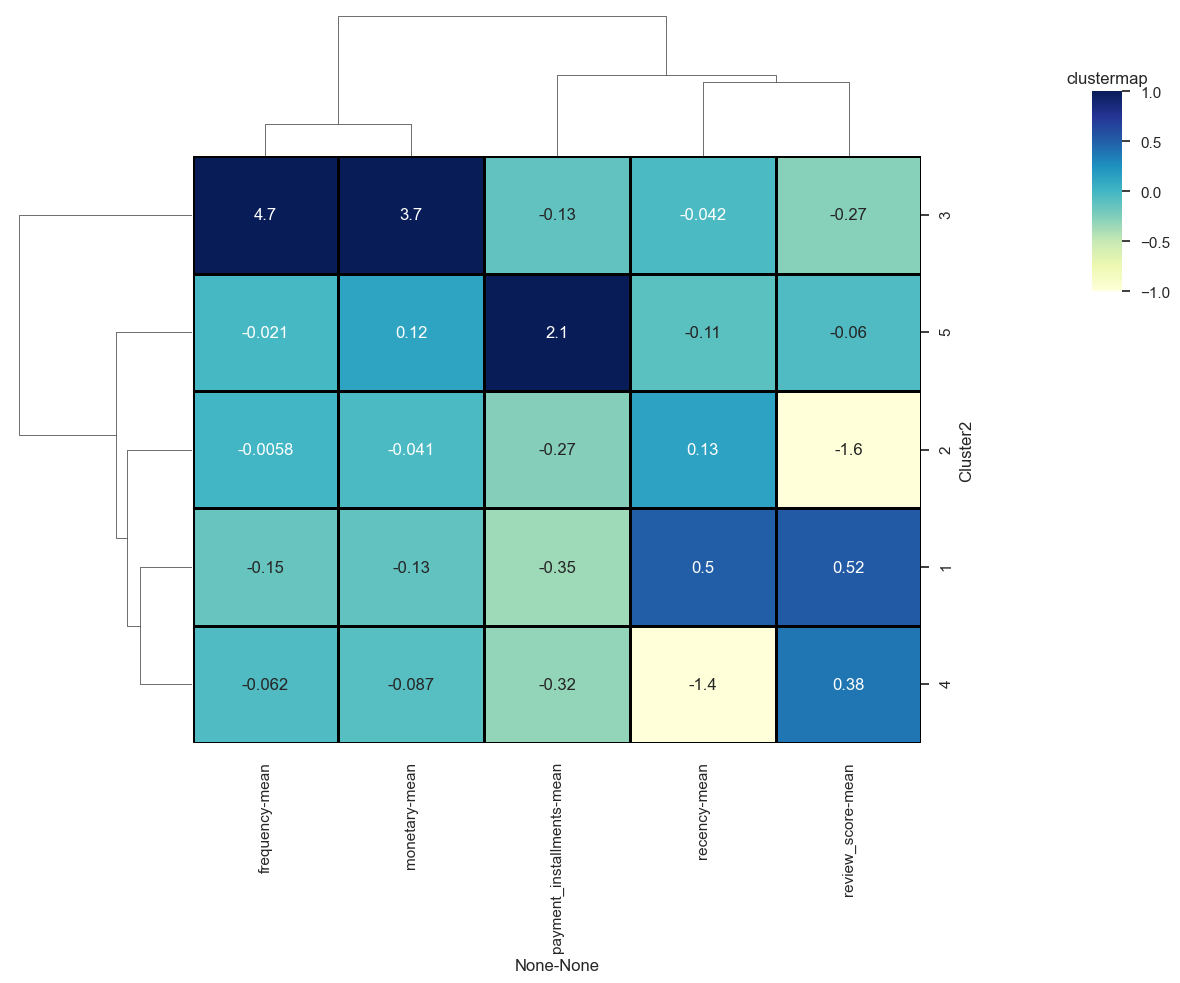

In [232]:
# Création d'une clustermap
plt.figure()
sns.set(rc={'figure.figsize':(13,10)})
sns.clustermap(df_clusters_moy_scaled,cmap ="YlGnBu", annot = True,linecolor='black',linewidths=1,vmin=-1, vmax=1,cbar_pos=(1.1, 0.7, .03, .2))
plt.title('clustermap')
plt.show()

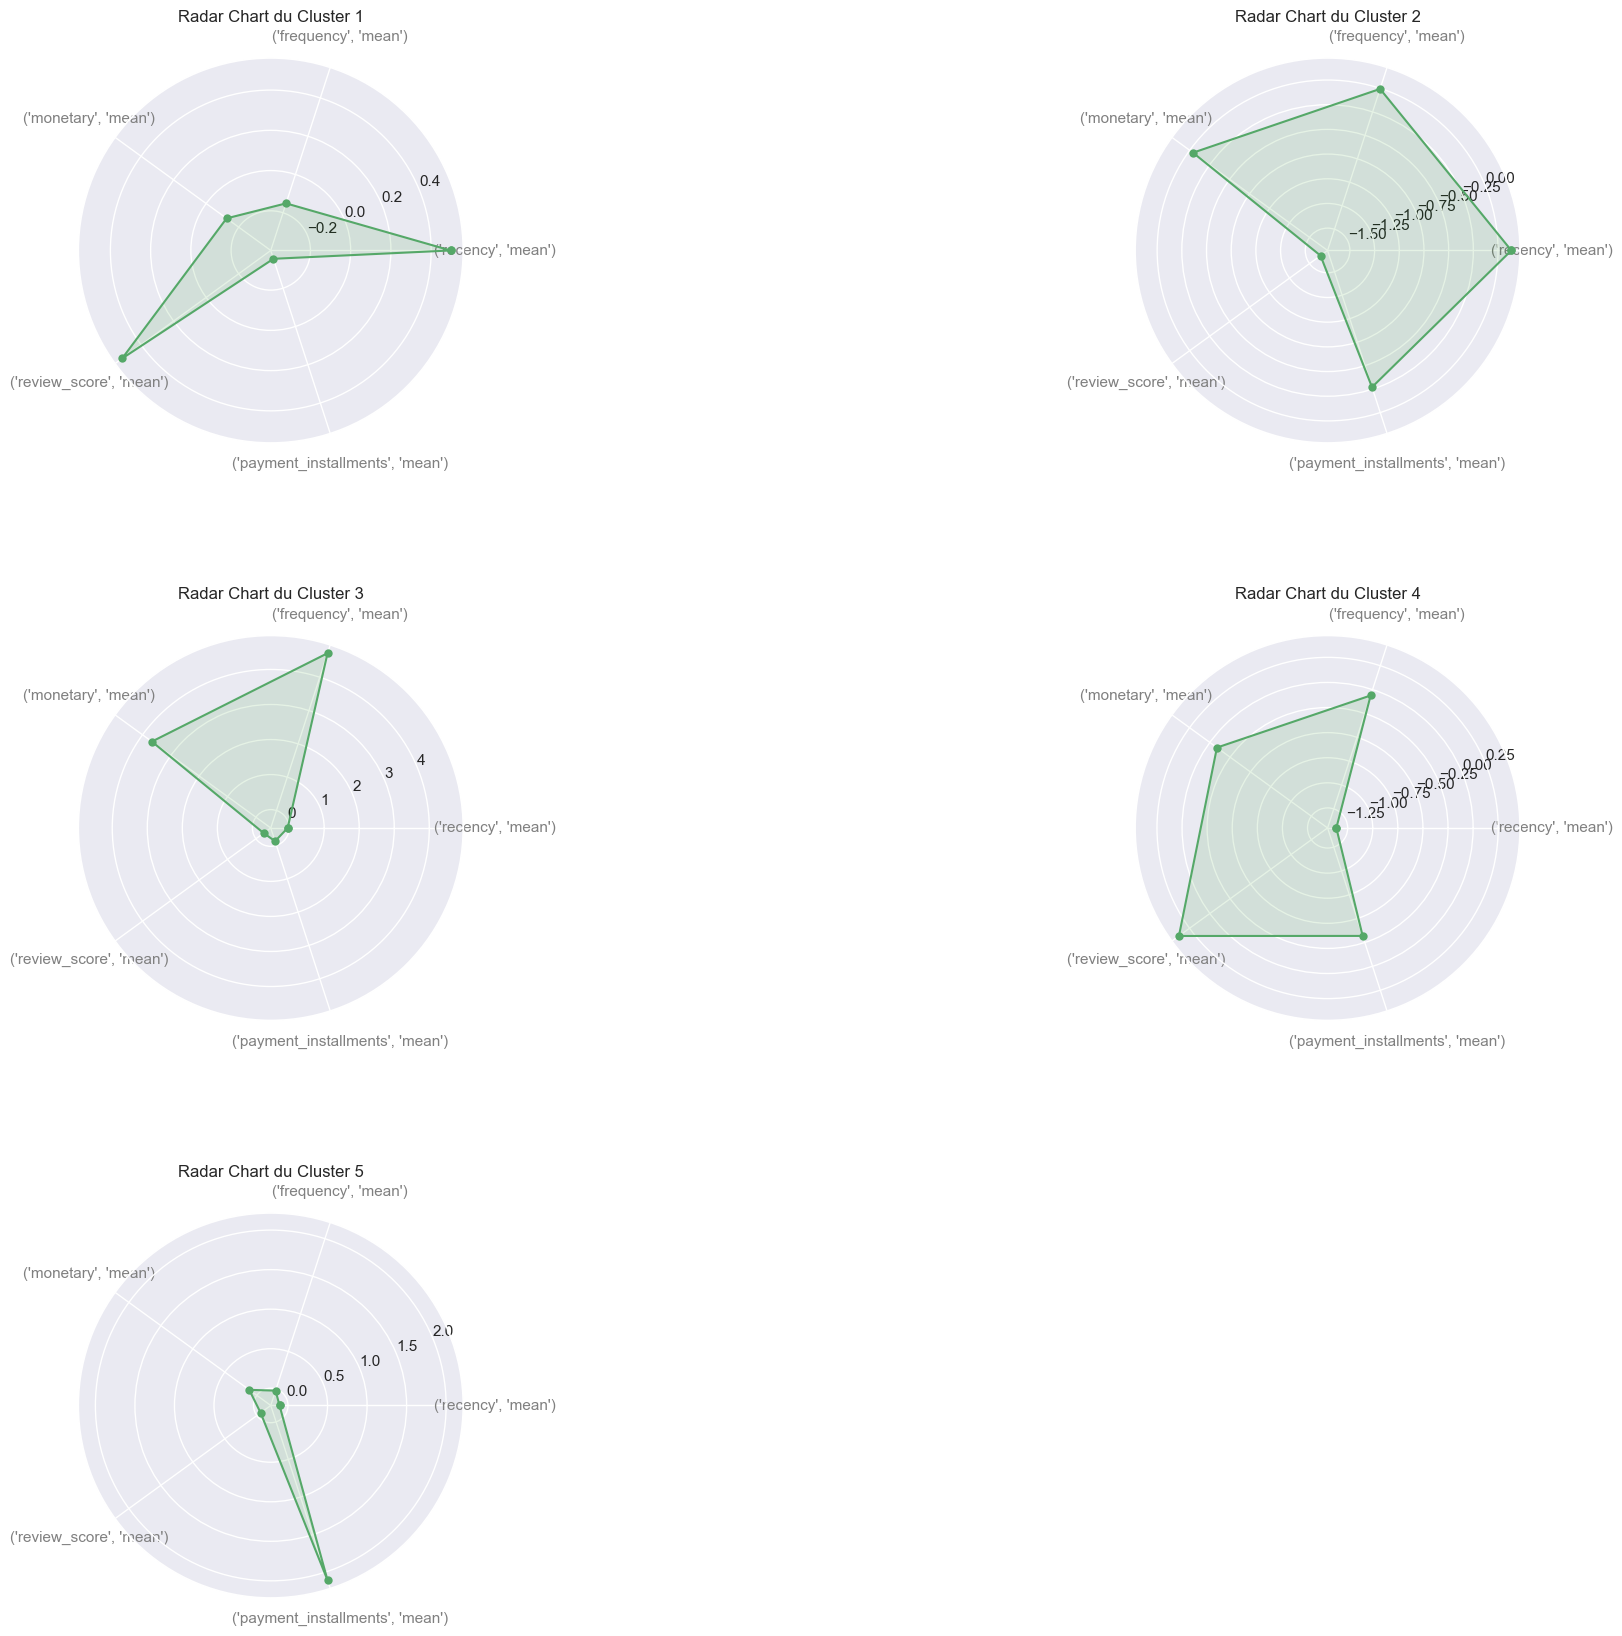

In [233]:
# Diagrammes de Kiviat :
fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.5) 
fig.tight_layout()

# Boucle pour créer un graphique en kiviat pour chaque cluster
for i in range(1, 6):  # Modification ici pour 5 clusters
    cluster_data = df_clusters_moy_scaled[df_clusters_moy_scaled.index == i]
    ax = fig.add_subplot(3, 2, i, projection="polar")  # Trois graphiques par ligne, deux lignes au total
    
    variables = cluster_data.columns  # Utiliser les colonnes comme variables
    values = cluster_data.iloc[0].values.tolist()
    values.append(values[0])  # Ajouter la première valeur à la fin pour fermer la boucle
    
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la boucle
    
    l1, = ax.plot(angles, values, color="C2", marker="o", label="Variable")
    ax.fill(angles, values, 'green', alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, color='grey', size=11)
    ax.tick_params(pad=10)
    
    ax.set_title(f"Radar Chart du Cluster {i}")

plt.show()


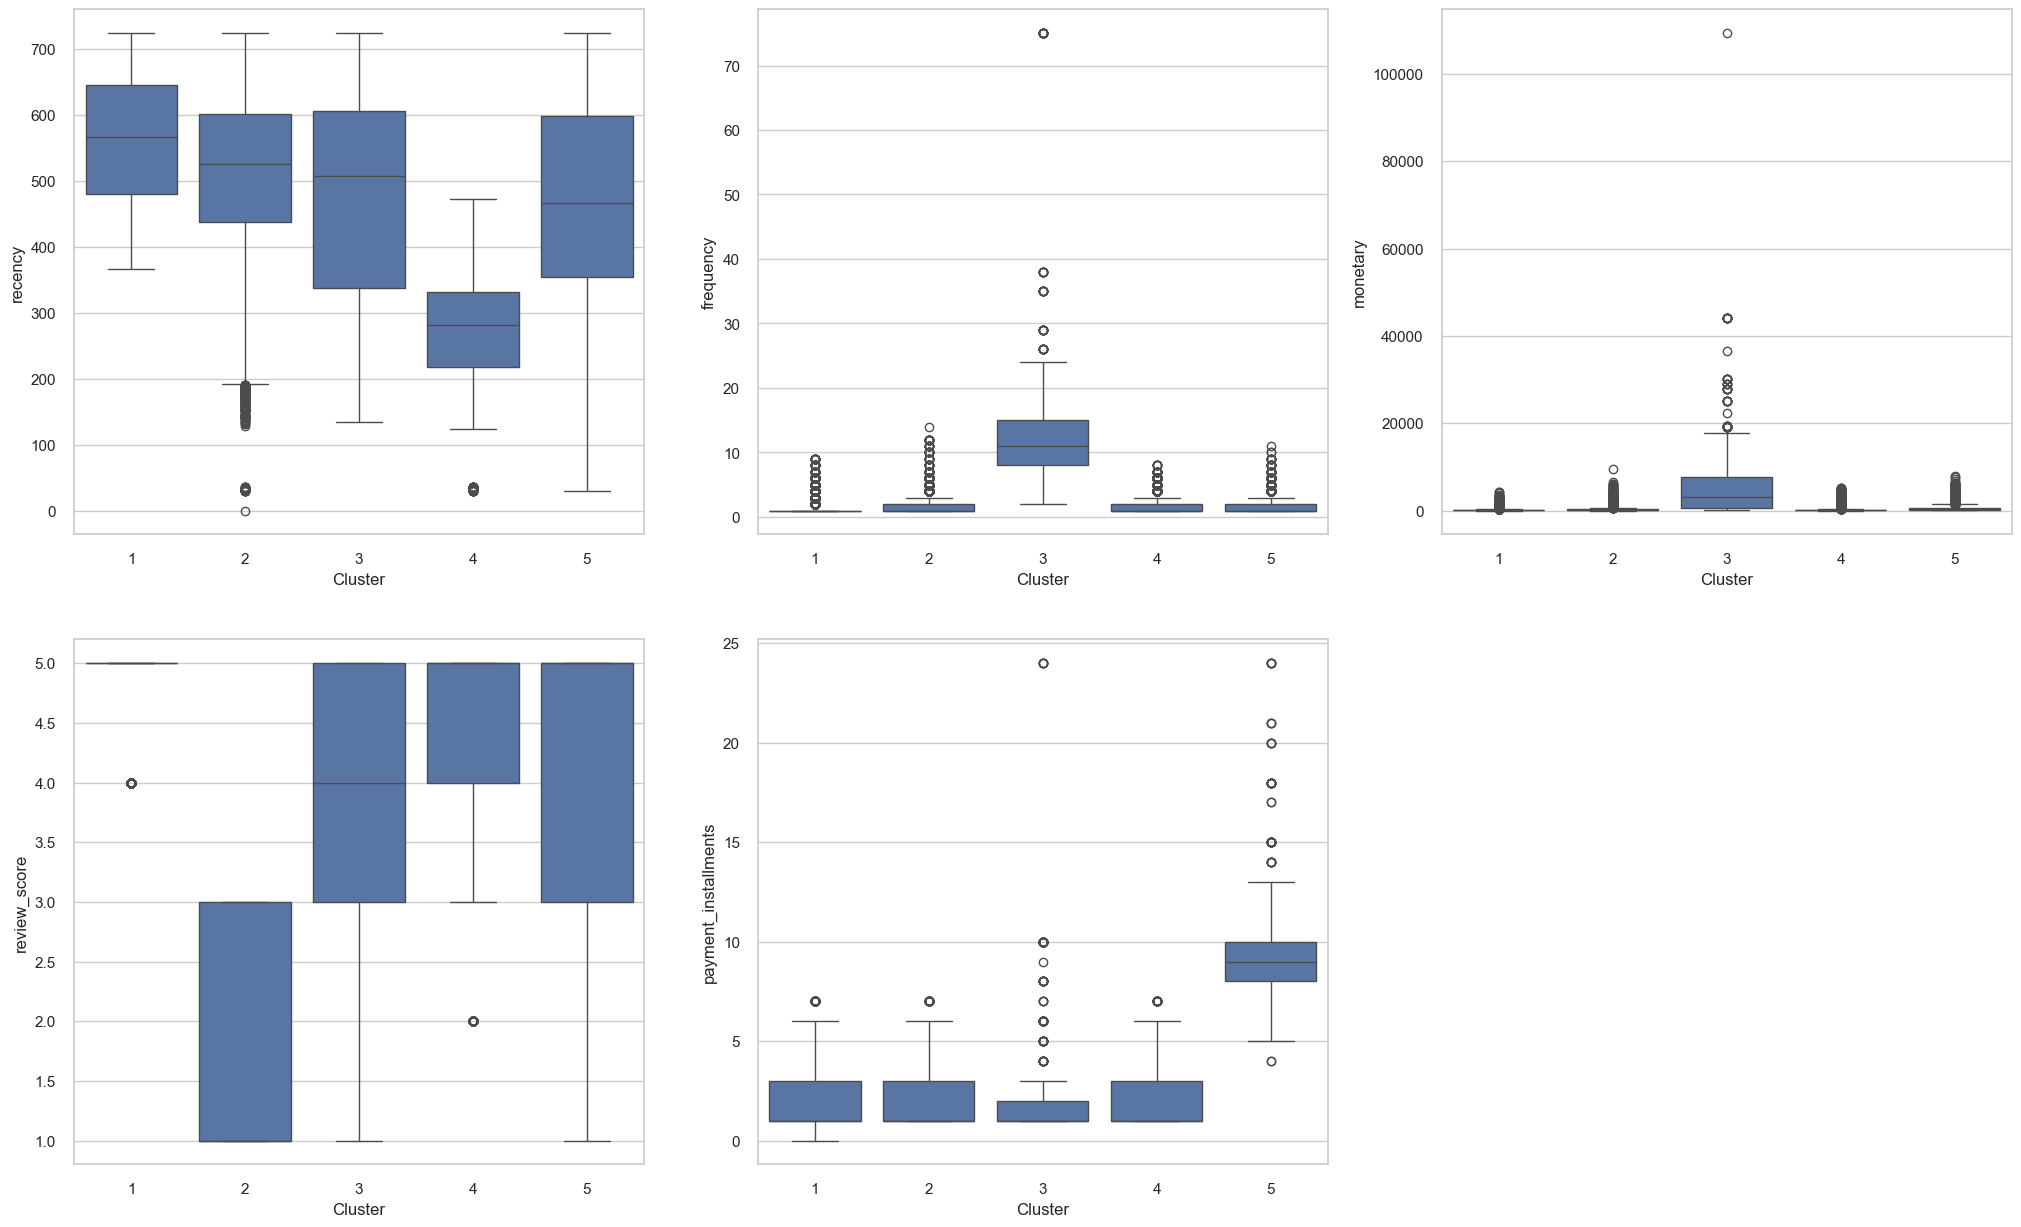

In [75]:
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

plt.subplot(2, 3, 1)
sns.boxplot(data=clients_clustered, x ='Cluster', y='recency')

plt.subplot(2, 3, 2)
sns.boxplot(data=clients_clustered, x ='Cluster', y='frequency')

plt.subplot(2, 3, 3)
sns.boxplot(data=clients_clustered, x ='Cluster', y='monetary')

plt.subplot(2, 3, 4) 
sns.boxplot(data=clients_clustered, x ='Cluster', y='review_score')

plt.subplot(2, 3, 5) 
sns.boxplot(data=clients_clustered, x ='Cluster', y= 'payment_installments')

plt.savefig("boxplots.png")
plt.show()


    Cluster 1 : Clients récemment actifs et fréquents, avec des dépenses moyennes et un bon score de révision, mais utilisant beaucoup de paiements échelonnés.

    Cluster 2 : Clients récemment actifs avec des dépenses moyennes et un bon score de révision, mais utilisant moins de paiements échelonnés.

    Cluster 3 : Clients relativement inactifs avec des dépenses et des fréquences d'achat moyennes, mais avec un score de révision élevé et peu de paiements échelonnés.

    Cluster 4 : Clients actifs avec des dépenses et des fréquences d'achat moyennes, mais avec un score de révision plus faible et utilisant des paiements échelonnés.

    Cluster 5 : Clients très actifs avec des dépenses, des fréquences d'achat et un score de révision élevés, mais avec peu de paiements échelonnés.

## DBSCAN

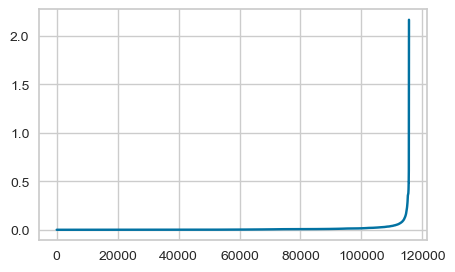

In [28]:
#Calcul de la proximité des données entre elles en utilisant Nearest Neighbours
neighb = NearestNeighbors(n_neighbors=5) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_scaled) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_scaled) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [29]:
#Utilisation de KneeLocator pour trouver le point de flexion
kneedle = KneeLocator(x=range(1, len(distances)+1), y=distances, S=10,
                      curve="convex", direction="increasing", online=True)

# Obtention de l'estimation du point de flexion
print(kneedle.knee_y)

0.018547978268925968


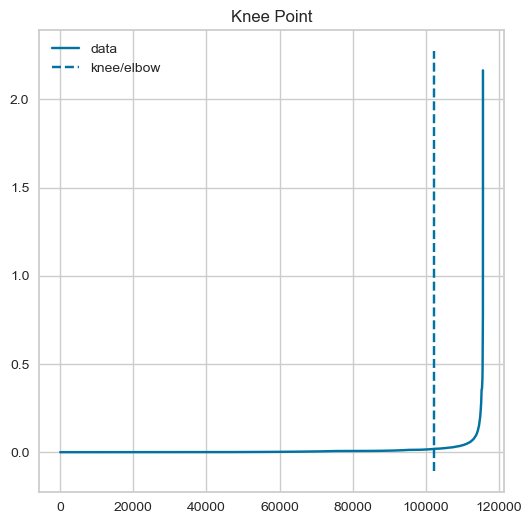

In [30]:
kneedle.plot_knee()
plt.show()

In [31]:
db_rfm = DBSCAN(eps=0.0185, min_samples=100)

db_rfm.fit(X_scaled)

DBSCAN(eps=0.0185, min_samples=100)

In [32]:
db_lab = db_rfm.labels_

In [39]:
rfm_db = rfm_df.copy()
rfm_db['cluster'] = db_lab
rfm_db = rfm_db[(rfm_db['cluster'] != -1)] 


In [40]:
rfm_db.groupby('cluster').mean()

recency  frequency   monetary  review_score  payment_installments
cluster                                                                      
0        516.087091        1.0  57.979723           5.0                   1.0
1        699.230216        1.0  64.639159           5.0                   1.0
2        452.759158        1.0  65.332175           5.0                   1.0
3        599.917359        1.0  62.069403           5.0                   1.0
4        562.824532        1.0  57.795281           5.0                   1.0
5        653.995399        1.0  58.102814           5.0                   1.0
6        435.919431        1.0  53.009289           5.0                   1.0
7        447.344371        1.0  57.423576           4.0                   1.0
8        479.366071        1.0  53.033304           5.0                   1.0
9        346.555556        1.0  56.876000           5.0                   1.0
10       428.846154        1.0  57.925481           5.0                   1.0

    Cluster 0: Clients récents, achètent une fois avec un montant moyen de 57.98, donnent généralement un score de révision de 5 et préfèrent payer en un seul versement.
    Cluster 1: Clients moins récents que le cluster 0, mais achètent de manière similaire.
    Cluster 2: Clients récents, dépensent légèrement plus avec un montant moyen de 65.33.
    Cluster 3: Clients récents avec un comportement d'achat similaire aux clusters précédents.
    Cluster 4: Clients récents avec des caractéristiques d'achat similaires au cluster 0.
    Cluster 5: Clients récents, comportement d'achat similaire mais avec une recency plus élevée.
    Cluster 6: Clients récents, dépensent légèrement moins avec un montant moyen de 53.01.
    Cluster 7: Clients récents, donnent principalement un score de révision de 4.
    Cluster 8: Clients récents, caractéristiques d'achat similaires au cluster 6.
    Cluster 9: Clients récents avec un comportement d'achat similaire aux autres clusters.
    Cluster 10: Clients récents, caractéristiques d'achat similaires aux clusters précédents.

In [46]:
print('Paramètres du modèle : epsilon : 0.0185, min_samples : 100.')
print('Nombre de clusters avec le modèle DBSCAN : ',
      len(set(db_lab)) - (1 if -1 in db_lab else 0))
print('Nombre de points considérés comme du bruit: ',
      list(db_lab).count(-1))
print('Silhouette Score : ', silhouette_score(X_scaled, db_lab))
print('Davies Bouldin Score : ', davies_bouldin_score(X_scaled, db_lab))


Paramètres du modèle : epsilon : 0.0185, min_samples : 100.
Nombre de clusters avec le modèle DBSCAN :  11
Nombre de points considérés comme du bruit:  104373
Silhouette Score :  -0.3732537420413579
Davies Bouldin Score :  1.5239869687234666


## kmodes de kprototypes

In [91]:
rfm_df3=rfm_df.copy()

In [92]:
rfm_df3.drop(columns=['cluster'], inplace=True)

In [93]:
rfm_df3.head()

recency  frequency  monetary  review_score  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      613          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      610          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      187          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      403          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      436          1    196.89           5.0   

                                  payment_installments  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2                   8.0  
0000b849f77a49e4a4ce2b2a4ca5be3f                   1.0  
0000f46a3911fa3c0805444483337064                   8.0  
0000f6ccb0745a6a4b88665a16c9f078                   4.0  
0004aac84e0df4da2b147fca70cf8255                   6.0

In [98]:
rfm_df3['payment_installments'].unique()

array([ 8.,  1.,  4.,  6.,  3.,  2., 10.,  5.,  7.,  9., 11., 15., 13.,
       18., 12., 23., 24., 14., 20., 17., 21., 22., 16.,  0.])

In [99]:
# Définition de la fonction pour transformer la colonne en catégorielle
def transform_installments(value):
    if value == 0:
        return 0
    else:
        return 1

# Appliquer la fonction à la colonne payment_installments
rfm_df3['payment_installments'] = rfm_df3['payment_installments'].apply(transform_installments)

# Vérifier les valeurs uniques après transformation
rfm_df3['payment_installments'].unique()


array([1, 0], dtype=int64)

In [100]:
rfm_df3.head()

recency  frequency  monetary  review_score  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      613          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      610          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      187          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      403          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      436          1    196.89           5.0   

                                  payment_installments  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2                     1  
0000b849f77a49e4a4ce2b2a4ca5be3f                     1  
0000f46a3911fa3c0805444483337064                     1  
0000f6ccb0745a6a4b88665a16c9f078                     1  
0004aac84e0df4da2b147fca70cf8255                     1

In [106]:
rfm_df4= rfm_df3.copy()

In [108]:
# Créer une instance de StandardScaler
scaler = StandardScaler()

# Sélectionner uniquement les colonnes numériques dans rfm_df3
numeric_data = rfm_df3[['recency', 'frequency', 'monetary','review_score']]  

# Standardiser les données numériques
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Créer un DataFrame avec les données standardisées
scaled_df = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns, index=numeric_data.index)

# Concaténer les données standardisées avec les colonnes catégorielles non modifiées
standardized_rfm_df3 = pd.concat([scaled_df, rfm_df3.drop(columns=['recency', 'frequency', 'monetary'])], axis=1)


In [114]:
from kmodes.kmodes import KModes

cost = []
for num_clusters in list(range(2,9)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(standardized_rfm_df3)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 322317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 106, cost: 293403.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 88, cost: 273983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 265932.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 255072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 252135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 250325.0


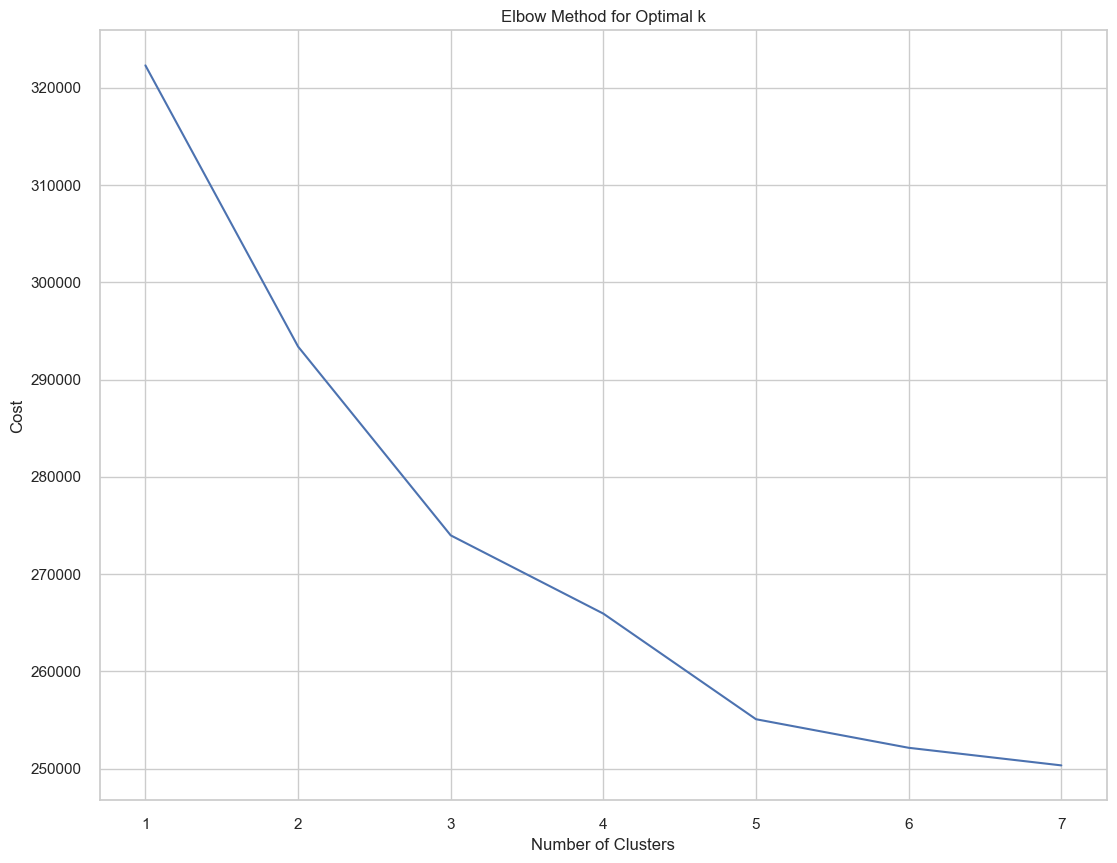

In [116]:
y = np.array([i for i in range(1,8,1)])  
plt.plot(y, cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()



In [123]:

model = KModes(init='Huang', n_clusters=4, verbose=1)

clusters = model.fit(standardized_rfm_df3)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 54, cost: 361976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 75589, cost: 304705.0
Run 2, iteration: 2/100, moves: 188, cost: 304705.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 108, cost: 345407.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 98, cost: 339717.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 63, cost: 335018.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 96, cost: 317253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 81, cost: 345535.0
Init: initializing centroid

In [124]:
print(model.cluster_centroids_)

[[-0.25952167  0.063569   -0.0421884   0.69689134  5.          1.        ]
 [-0.25299191 -0.28598794 -0.21666888  0.69689134  5.          1.        ]
 [-0.25952167 -0.28598794 -0.18968677 -0.02482766  4.          1.        ]
 [-0.25952167 -0.28598794 -0.18968677  0.69689134  5.          1.        ]]


In [236]:
# Obtenir les étiquettes de cluster
cluster_labels = model.labels_

# Ajouter les étiquettes de cluster à votre dataframe
standardized_rfm_df3['cluster'] = cluster_labels

In [237]:
# Ajouter une colonne 'cluster' à rfm_df4 et lui affecter les clusters obtenus
rfm_df4['cluster'] =cluster_labels


In [238]:
rfm_df4.head()

recency  frequency  monetary  review_score  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2      613          1    141.90           5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f      610          1     27.19           4.0   
0000f46a3911fa3c0805444483337064      187          1     86.22           3.0   
0000f6ccb0745a6a4b88665a16c9f078      403          1     43.62           4.0   
0004aac84e0df4da2b147fca70cf8255      436          1    196.89           5.0   

                                  payment_installments  cluster  
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                     1        1  
0000b849f77a49e4a4ce2b2a4ca5be3f                     1        2  
0000f46a3911fa3c0805444483337064                     1        1  
0000f6ccb0745a6a4b88665a16c9f078                     1        2  
0004aac84e0df4da2b147fca70cf8255                     1        1

In [129]:
rfm_df4['cluster'].value_counts()

1    62869
0    29961
2    22217
3      561
Name: cluster, dtype: int64

### Anlyse clusters

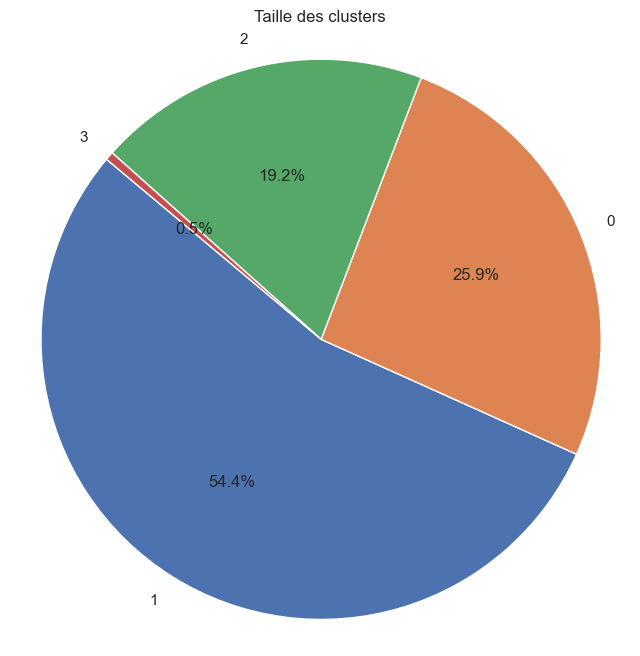

In [132]:
# Compter le nombre d'éléments dans chaque cluster
cluster_sizes_Kmodes = rfm_df4["cluster"].value_counts()

# Créer un camembert
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes_Kmodes, labels=cluster_sizes_Kmodes.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Pour que le camembert soit un cercle et non une ellipse
plt.title("Taille des clusters")
plt.show()

In [133]:
# Calcul de la moyenne des variables pour chaque cluster 
K_moy = rfm_df4.groupby('cluster').agg(['mean'])
K_moy.head()

recency frequency    monetary review_score payment_installments
               mean      mean        mean         mean                 mean
cluster                                                                    
0        484.085812  3.613498  874.531616     3.717132             0.999933
1        488.148006  1.016733  154.715442     4.198667             0.999984
2        482.724220  1.685196  340.628219     3.973039             1.000000
3        424.577540  1.010695  123.827986     5.000000             1.000000

In [239]:
# Calcul de la moyenne des variables pour chaque cluster 
K_moy_scaled = standardized_rfm_df3.groupby('cluster').agg(['mean'])
K_moy_scaled.head()

recency frequency  monetary review_score            \
             mean      mean      mean         mean      mean   
cluster                                                        
0       -0.010830  0.627578  0.315451    -0.228979  3.717132   
1        0.015695 -0.280139 -0.140790     0.118554  4.198667   
2       -0.019721 -0.046473 -0.022953    -0.044286  3.973039   
3       -0.399405 -0.282249 -0.160367     0.696891  5.000000   

        payment_installments  
                        mean  
cluster                       
0                   0.999933  
1                   0.999984  
2                   1.000000  
3                   1.000000

<Figure size 800x600 with 0 Axes>

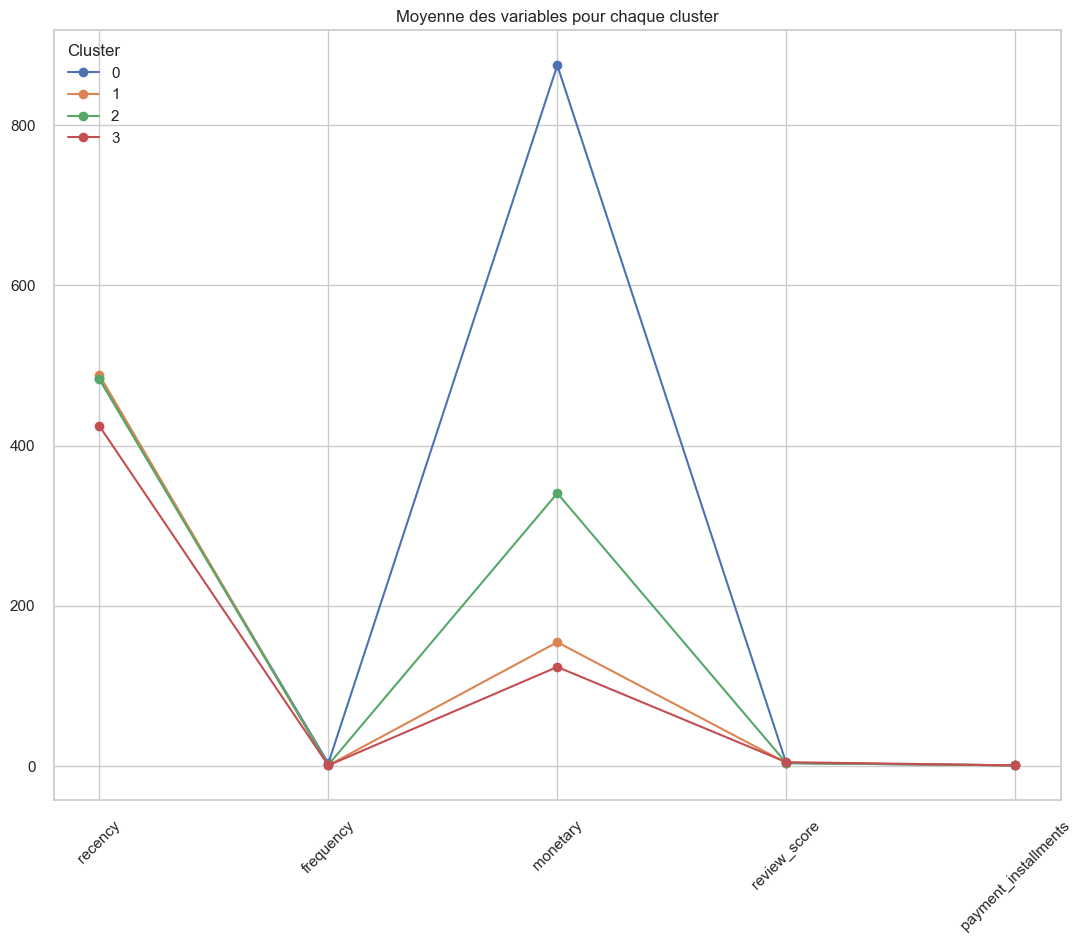

In [134]:
# Définir les noms des variables
variables = ['recency', 'frequency', 'monetary','review_score', 'payment_installments']

# Transposer le DataFrame pour avoir les clusters en colonnes et les variables en index
rfm_clusters_moy_T = K_moy.T

# Créer le graphique en utilisant la fonction plot
plt.figure(figsize=(8, 6))
rfm_clusters_moy_T.plot(kind='line', marker='o', markersize=7)

plt.title('Moyenne des variables pour chaque cluster')
plt.legend(title='Cluster', loc='upper left')
plt.xticks(range(len(variables)), variables, rotation=45)
plt.grid(True)
plt.show()

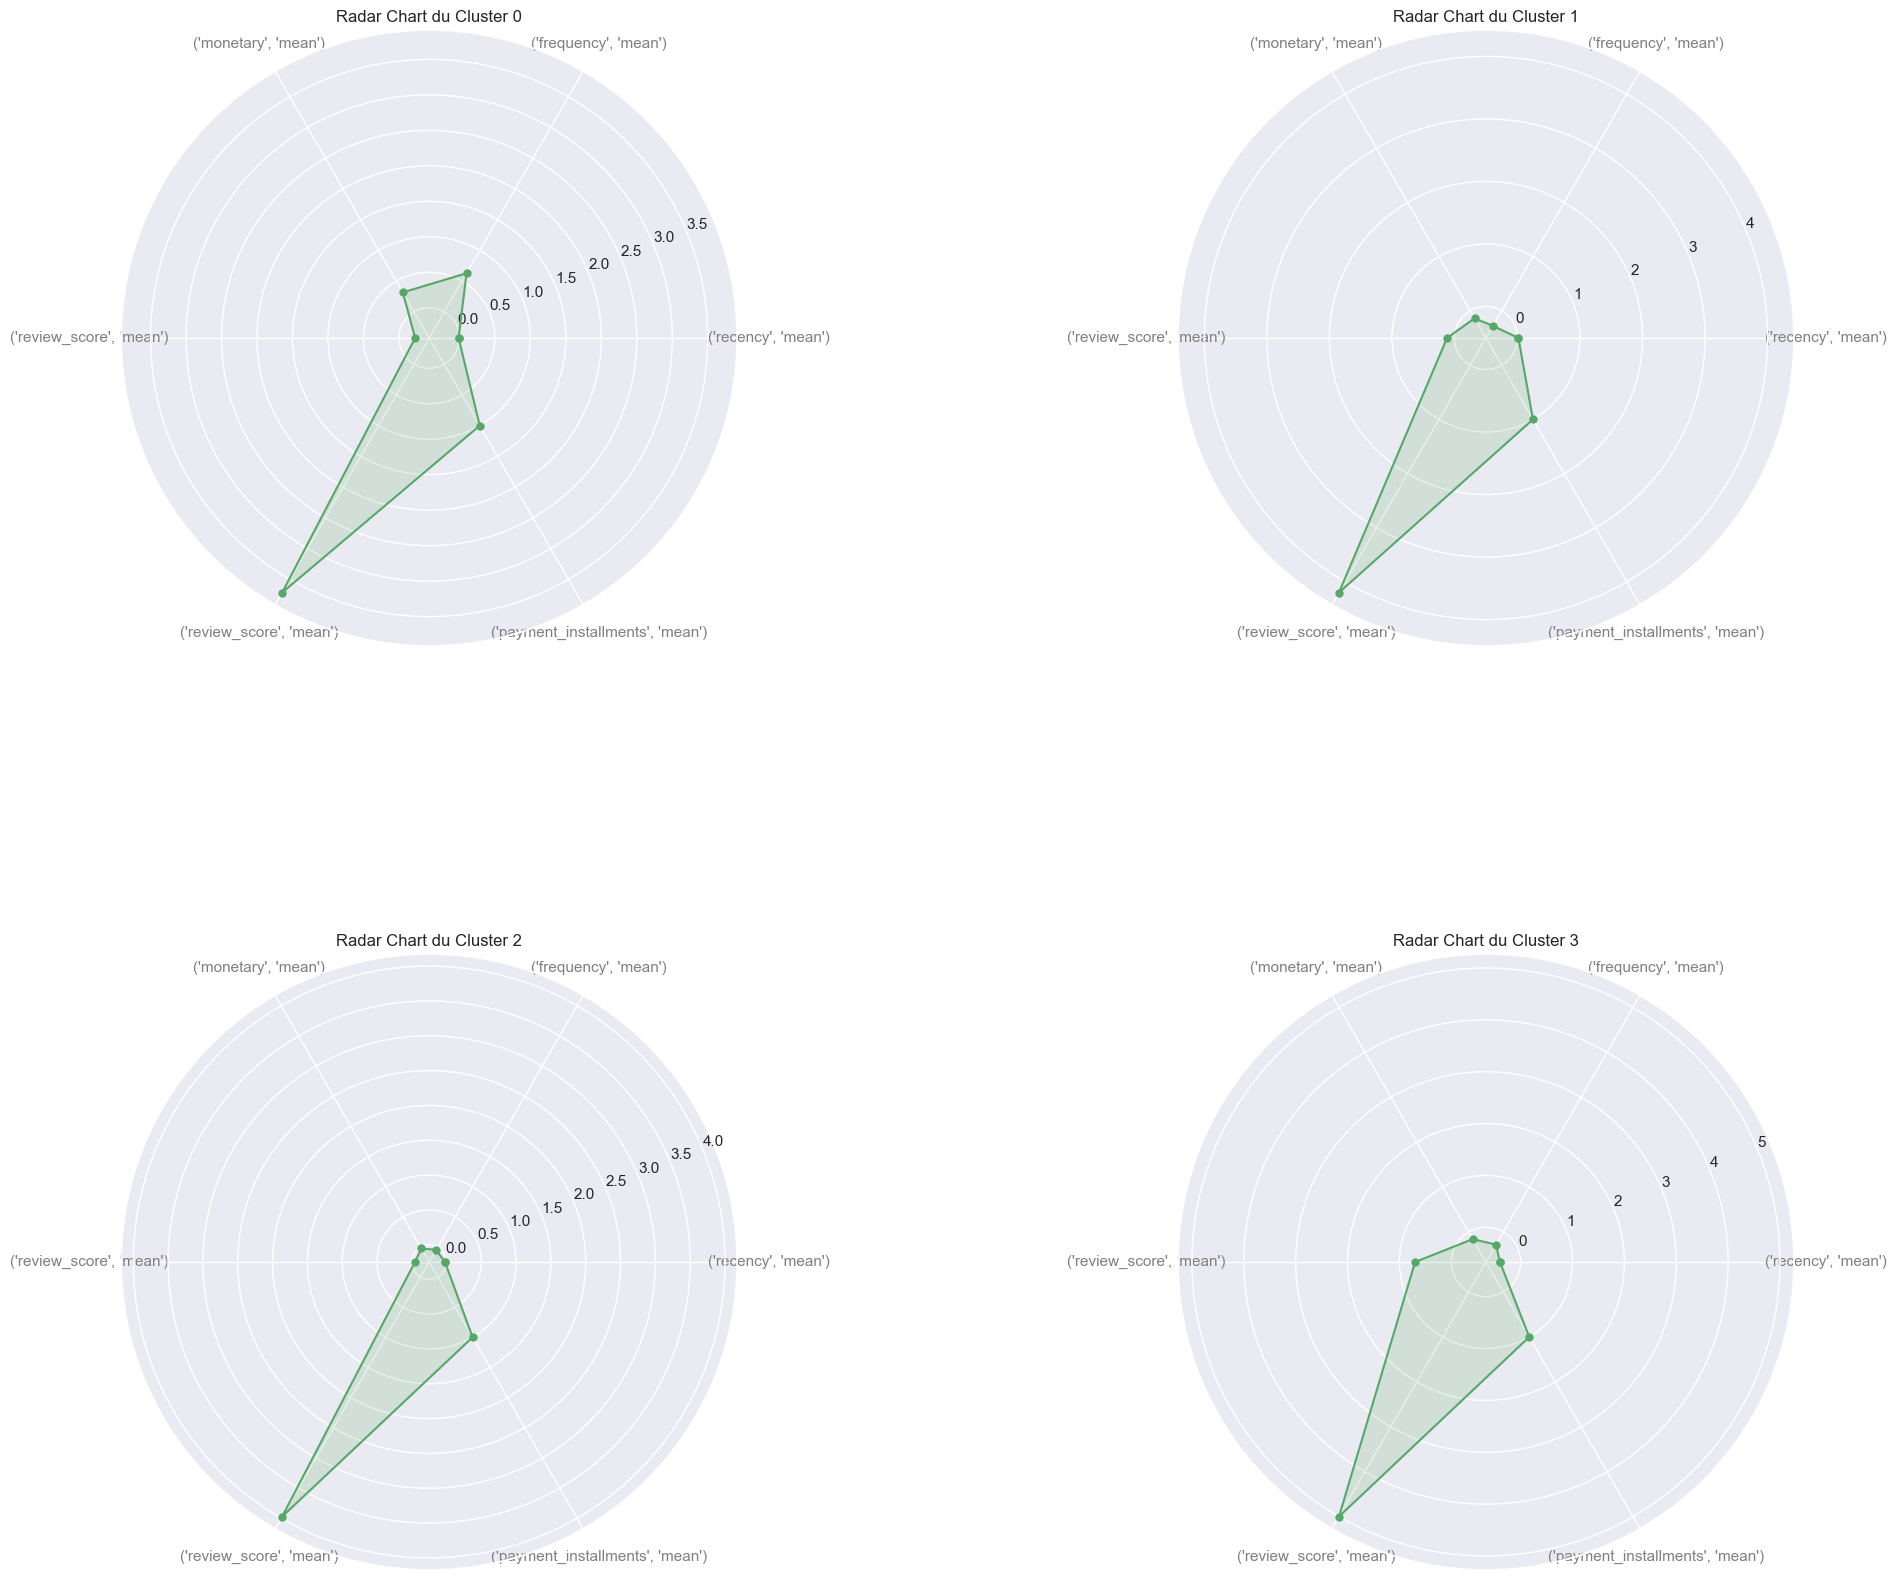

In [240]:
# Données des clusters avec les indices ajustés
adjusted_clusters = K_moy_scaled.copy()
adjusted_clusters.index = adjusted_clusters.index 

# Diagrammes de Kiviat :
fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.5) 
fig.tight_layout()

# Boucle pour créer un graphique en kiviat pour chaque cluster
for i in range(4):  # Modification ici pour 4 clusters
    cluster_data = adjusted_clusters[adjusted_clusters.index == i]
    ax = fig.add_subplot(2, 2, i+1, projection="polar")  # Deux graphiques par ligne, deux lignes au total
    
    variables = cluster_data.columns  # Utiliser les colonnes comme variables
    values = cluster_data.iloc[0].values.tolist()
    values.append(values[0])  # Ajouter la première valeur à la fin pour fermer la boucle
    
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la boucle
    
    l1, = ax.plot(angles, values, color="C2", marker="o", label="Variable")
    ax.fill(angles, values, 'green', alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables, color='grey', size=11)
    ax.tick_params(pad=10)
    
    ax.set_title(f"Radar Chart du Cluster {i}")

plt.show()



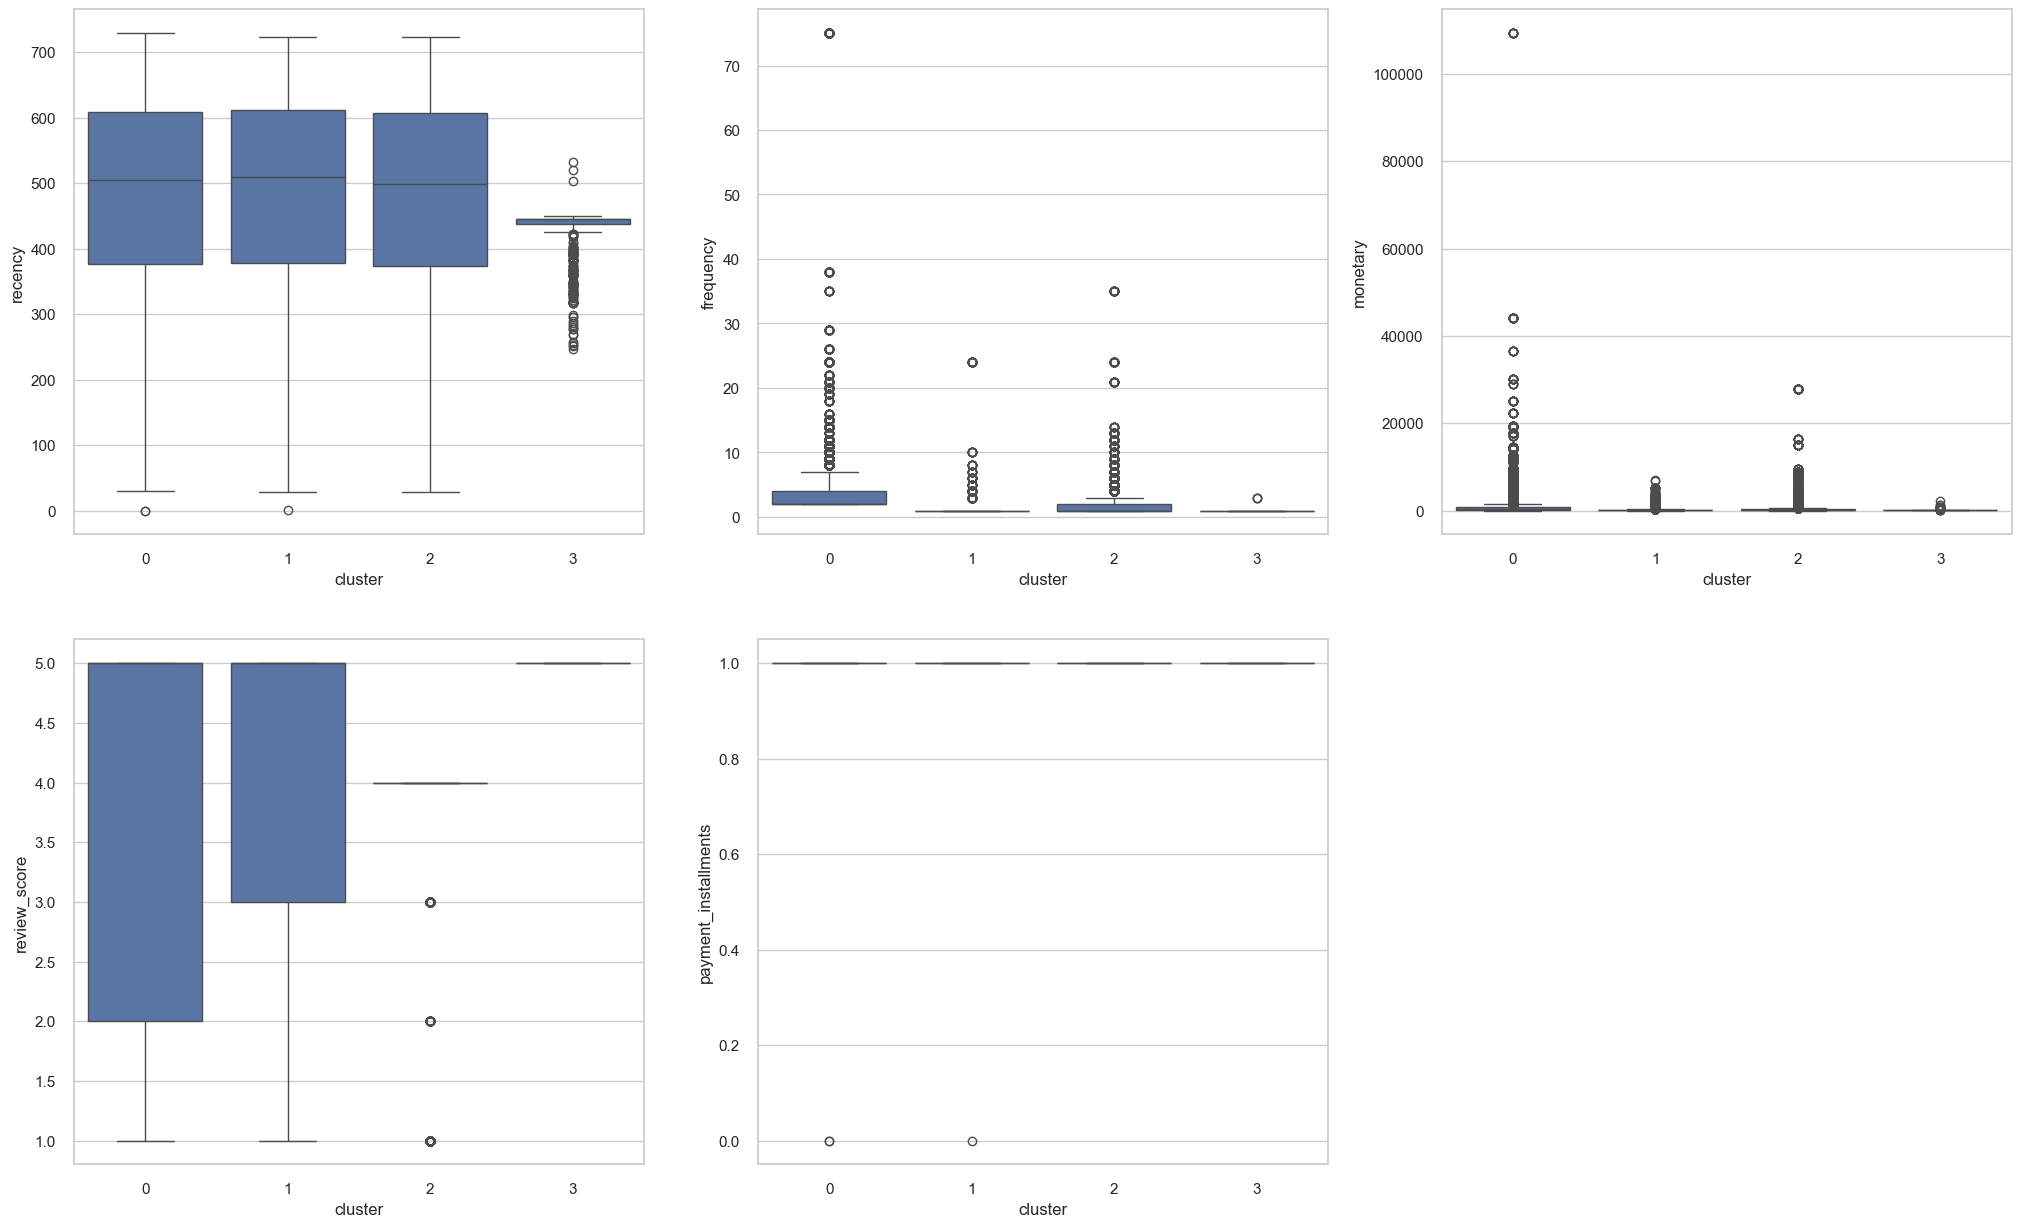

In [140]:
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

plt.subplot(2, 3, 1)
sns.boxplot(data=rfm_df4, x ='cluster', y='recency')

plt.subplot(2, 3, 2)
sns.boxplot(data=rfm_df4, x ='cluster', y='frequency')

plt.subplot(2, 3, 3)
sns.boxplot(data=rfm_df4, x ='cluster', y='monetary')

plt.subplot(2, 3, 4) 
sns.boxplot(data=rfm_df4, x ='cluster', y='review_score')

plt.subplot(2, 3, 5) 
sns.boxplot(data=rfm_df4, x ='cluster', y= 'payment_installments')

plt.savefig("boxplots.png")
plt.show()


    Cluster 0 : Clients fidèles et actifs qui réalisent des achats fréquents et de grande valeur, avec une satisfaction moyenne et une utilisation régulière de versements.
    Cluster 1 : Clients inactifs depuis un certain temps, effectuant peu d'achats avec de faibles montants, mais affichant une satisfaction légèrement supérieure à la moyenne.
    Cluster 2 : Clients inactifs depuis un certain temps, mais ayant réalisé quelques achats de montants moyens, avec une satisfaction moyenne et une utilisation fréquente de versements.
    Cluster 3 : Nouveaux clients ou clients inactifs depuis un certain temps, effectuant peu d'achats avec des montants faibles, mais affichant une satisfaction maximale.

In [143]:
rfm_df.to_csv(r'C:\Users\imane\Downloads\data_science\projet5\rfm.csv' , index=False)